In [4]:
library('hdp')
library('clusterCrit')
library('grid')
library('gridExtra')
library('ggplot2')
library('ggrepel')
library('RColorBrewer')
library('dplyr')
library('reshape2')
library('IRdisplay')
source('../../../src/tools.R')     # custom tools function
source('../../../src/hdp_tools.R') # hdp related functions
source('../../../src/hdp_tools_yanis.R')
theme_set(theme_minimal())

# set jupyer notebook parameters
options(repr.plot.res        = 100, # set a medium-definition resolution for the jupyter notebooks plots (DPI)
        repr.matrix.max.rows = 200, # set the maximum number of rows displayed
        repr.matrix.max.cols = 200) # set the maximum number of columns displayed


Run citation('hdp') for citation instructions,
    and file.show(system.file('LICENSE', package='hdp')) for license details.

Attaching package: ‘dplyr’

The following object is masked from ‘package:gridExtra’:

    combine

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



In [3]:
df_final <- read.table("../../../data/updated_dataset/modif_final.csv",sep = ',' , header = T)
rownames(df_final)<- df_final$X
df_final <- df_final[,-1:-3]

# LET'S LOOK AT THE NEW GRIDSEARCH OPTIMIZED

In [4]:
new_table <- read.table("hdp_gridsearch_modif.tsv",sep = '\t' , header = T)

In [5]:
new_table[order(new_table$n_components,decreasing=T),]

chains inicc n   burnin space base_dist alphaa alphab n_components
3  3      13    350 7000   20    gaussian  2      0.5    10          
11 3      13    400 7000   20    gaussian  2      0.5    10          
6  3      13    350 7000   20    uniform   1      1.0     9          
17 3      15    350 7000   20    gaussian  1      0.5     9          
18 3      15    350 7000   20    gaussian  1      1.0     9          
21 3      15    350 7000   20    uniform   1      0.5     9          
24 3      15    350 7000   20    uniform   2      1.0     9          
25 3      15    400 7000   20    gaussian  1      0.5     9          
26 3      15    400 7000   20    gaussian  1      1.0     9          
5  3      13    350 7000   20    uniform   1      0.5     8          
7  3      13    350 7000   20    uniform   2      0.5     8          
13 3      13    400 7000   20    uniform   1      0.5     8          
14 3      13    400 7000   20    uniform   1      1.0     8          
15 3      13    400 7000   20    uniform   2      0.5     8          
19 3      15    350 7000   20    gaussian  2      0.5     8          
20 3      15    350 7000   20    gaussian  2      1.0     8          
22 3      15    350 7000   20    uniform   1      1.0     8          
27 3      15    400 7000   20    gaussian  2      0.5     8          
28 3      15    400 7000   20    gaussian  2      1.0     8          
29 3      15    400 7000   20    uniform   1      0.5     8          
30 3      15    400 7000   20    uniform   1      1.0     8          
32 3      15    400 7000   20    uniform   2      1.0     8          
2  3      13    350 7000   20    gaussian  1      1.0     7          
4  3      13    350 7000   20    gaussian  2      1.0     7          
8  3      13    350 7000   20    uniform   2      1.0     7          
10 3      13    400 7000   20    gaussian  1      1.0     7          
12 3      13    400 7000   20    gaussian  2      1.0     7          
16 3      13    400 7000   20    uniform   2      1.0     7          
23 3      15    350 7000   20    uniform   2      0.5     7          
31 3      15    400 7000   20    uniform   2      0.5     7          
1  3      13    350 7000   20    gaussian  1      0.5     5          
9  3      13    400 7000   20    gaussian  1      0.5     5          
   component_0 assignment Davies_Bouldin Silhouette
3   48         1806       3.086804       0.08488329
11   3         1851       2.833891       0.08279637
6    3         1844       2.543973              NaN
17  24         1834       3.148638       0.08975511
18  39         1810       2.790786              NaN
21   1         1777       2.374374              NaN
24   1         1572       2.506939              NaN
25  24         1837       3.136180       0.08971015
26  37         1812       2.784827              NaN
5    5         1828       2.735045              NaN
7    2         1831       2.774303       0.07038884
13   5         1833       2.735623              NaN
14  89         1844       2.639903              NaN
15   2         1829       2.765264       0.07034618
19  80         1834       3.029097       0.07844308
20  86         1805       3.438873       0.07611296
22  93         1832       2.659982              NaN
27  82         1837       3.012885       0.07892412
28  35         1818       2.954234       0.09757999
29   2         1832       2.676639       0.07126425
30  91         1835       2.654973              NaN
32 105         1795       2.680523              NaN
2    5         1894       2.836651       0.08420474
4   68         1812       3.328456       0.07451273
8   64         1834       2.747482              NaN
10   5         1896       2.834866       0.08351616
12  63         1809       3.263287       0.07647877
16  65         1833       2.781163              NaN
23  55         1831       3.031006              NaN
31  46         1829       2.867086              NaN
1  748         1933       2.815815       0.10939413
9  746         1931       2.8

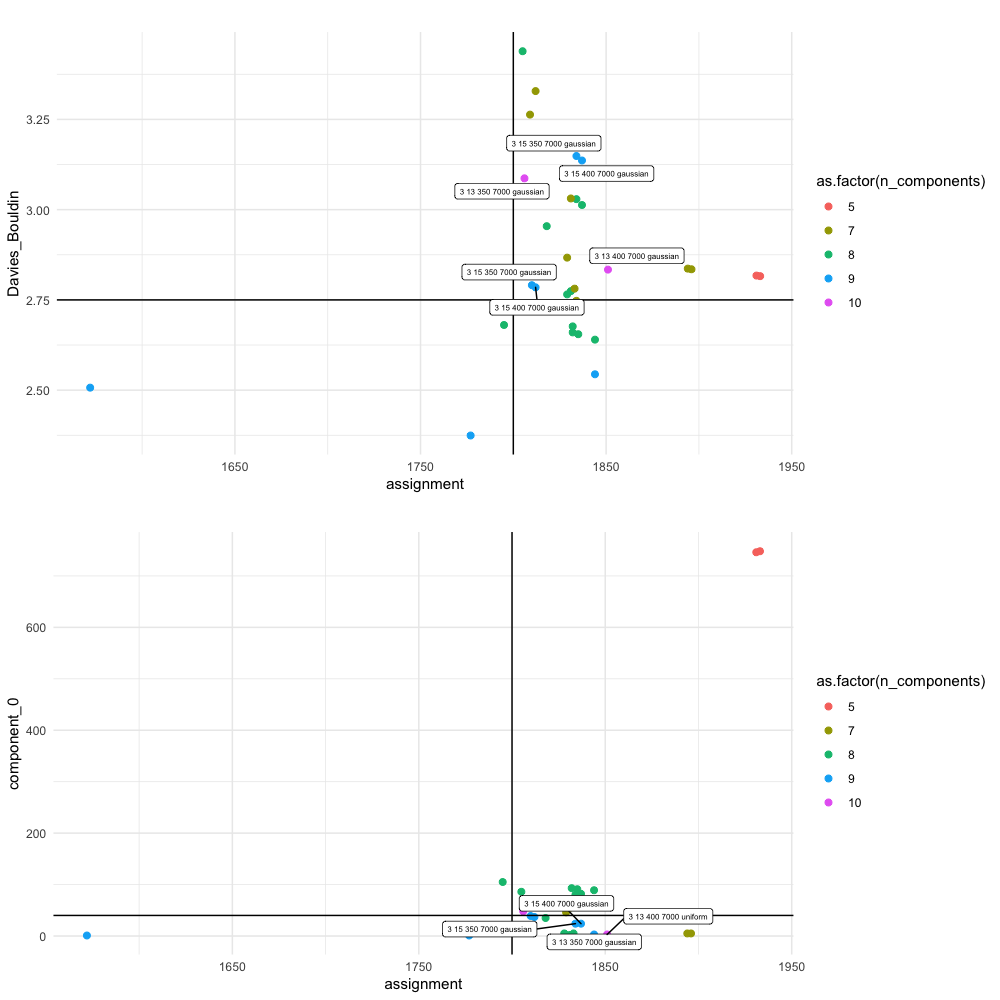

In [6]:
# plot the results of the gridsearch

set_notebook_plot_size(10, 10)

# add labels
#new_table_S_DB <- new_table[new_table$assignment > 1800 & new_table$n_components > 8,]
#new_table_S_DB$good <- ifelse(new_table_S_DB$assignment > 1800 & new_table$n_components > 8, paste(new_table_S_DB$chains,new_table_S_DB$inicc,new_table_S_DB$n,new_table_S_DB$burnin,new_table_S_DB$base_dist),'')

new_table_S_DB <- new_table[new_table$assignment > 1805 & new_table$Davies_Bouldin > 2.75,]
new_table_S_DB$good <- ifelse(new_table_S_DB$n_components>=9 & new_table_S_DB$assignment > 1805 & new_table_S_DB$Davies_Bouldin > 2.75, paste(new_table_S_DB$chains,new_table_S_DB$inicc,new_table_S_DB$n,new_table_S_DB$burnin,new_table_S_DB$base_dist),'')

new_table_A_0 <- new_table[new_table$assignment > 1830 & new_table$component_0 < 40,]
new_table_A_0$good <- ifelse(new_table_A_0$n_components>=9 & new_table_A_0$assignment > 1830 & new_table_A_0$component_0 < 40, paste(new_table_A_0$chains,new_table_A_0$inicc,new_table_A_0$n,new_table_A_0$burnin,new_table_S_DB$base_dist),'')

g1 <- ggplot(new_table) +
        geom_point(aes(x = assignment, y = Davies_Bouldin, col = as.factor(n_components)), size = 2) +
        #scale_color_manual(values=c("red", "orange", "green",'blue',"dark", "orange", "green",'blue',"red", "orange", "green",'blue'), labels = 0:11, name = 'Number of components') +
        ggtitle('') +
        geom_hline(yintercept = 2.75) + #we want higher than 3rd quart
        geom_vline(xintercept = 1800) + #we want higher than 3rd quart
        geom_label_repel(aes(x = assignment, y = Davies_Bouldin, label=good), size=2, data=new_table_S_DB)

g2 <- ggplot(new_table) +
        geom_point(aes(x = assignment, y = component_0, col = as.factor(n_components)), size = 2) +
        #scale_color_manual(values=c("red", "orange", "green",'blue'),labels = 8:11, name = 'Number of components') +
        ggtitle('') +
        geom_hline(yintercept = 40) + #we want lower than 1st quart
        geom_vline(xintercept = 1800) + #we want higher than 3rd quart
        geom_label_repel(aes(x = assignment, y = component_0, label=good), size=2, data=new_table_A_0)

grid.arrange(g1, g2, ncol = 1)

In [ ]:
10 components : 3 13 400 7000 20 0.5 2 gaussian

In [7]:
num_cols = ncol(df_final)
bin <- function(x){
    set.seed(123)
  (rbinom(1, num_cols, mean(x))+1)/num_cols
}

###Normal

normal <- function(x){
    set.seed(123)
  abs(rnorm(1,mean(x),sd(x)))
}

###Poisson

poisson <- function(x){
    set.seed(123)
  (rpois(num_cols,1)+1)/num_cols
}

###Uniform equally over all columns

equally <- function(x){
    set.seed(123)
  1/num_cols
}

###Repet 1

repet <- function(x){
    set.seed(123)
  1
}

#sapply(df_gene,equally)
binomial <- unlist(sapply(df_final,bin))
gaussian <- unlist(sapply(df_final,normal))
pois <- as.numeric(unlist(sapply(df_final,poisson)))
unif <- unlist(sapply(df_final,equally))
repetition <- unlist(sapply(df_final,repet))
lists<- list(binomial,gaussian,unif,repetition)
#for (lis in lists) {
#    initialise_hdp_yanis(data=df_final,alphaa=1,alphab=1,hh=lis)
#}#

In [8]:
launch <- function(data,base_dist,initial_clusters,burn,posterior_samples,chains,aa,ab){
    number_of_chains <- chains
    chain_list <- vector('list', number_of_chains)
    hdp <- initialise_hdp_yanis(data = data,hh=base_dist,alphaa = aa,alphab= ab)


    for (i in 1:number_of_chains) {
        seed <- i * 100
        print_and_flush(sprintf('### Experiment %d (seed = %d) ###\n', i, seed))

        # run single hdp chain
        chain_list[[i]] <- activate_and_run_hdp(hdp,
                                                initcc = initial_clusters,
                                                burnin = burn,
                                                n      = posterior_samples,
                                                space  = 20,
                                                seed   = seed)
        print_and_flush('\n')
    }

    multi_output <- hdp_multi_chain(chain_list)
    print(multi_output)
}

In [9]:
data <- df_final
posterior_samples <- 400
initial_clusters <- 13
burn <- 7000
chains <- 3
base_dist <- gaussian
aa <- 2
ab <-0.5

Initialise HDP on a 2150 x 103 dataframe
  → create HDP structure... done!
  → add DP node for each patient... done!
  → assign the data to the nodes... done!
### Experiment 1 (seed = 100) ###
Activate HDP nodes and run posterior sampling
  → activate HDP nodes... done!
  → run posterior sampling...
[1] "7000 burn-in iterations in 0.4 mins"

### Experiment 2 (seed = 200) ###
Activate HDP nodes and run posterior sampling
  → activate HDP nodes... done!
  → run posterior sampling...
[1] "7000 burn-in iterations in 0.4 mins"

### Experiment 3 (seed = 300) ###
Activate HDP nodes and run posterior sampling
  → activate HDP nodes... done!
  → run posterior sampling...
[1] "7000 burn-in iterations in 0.4 mins"

Object of class hdpSampleMulti 
 Number of chains: 3 
 Total posterior samples: 1200 
 Components: NO. Run hdp_extract_components 
 ----------
 Final hdpState from first chain: 
Object of class hdpState 
 Number of DP nodes: 2151 
 Index of parent DP: 0 1 1 1 1 1 1 1 1 1 ...
 Number of

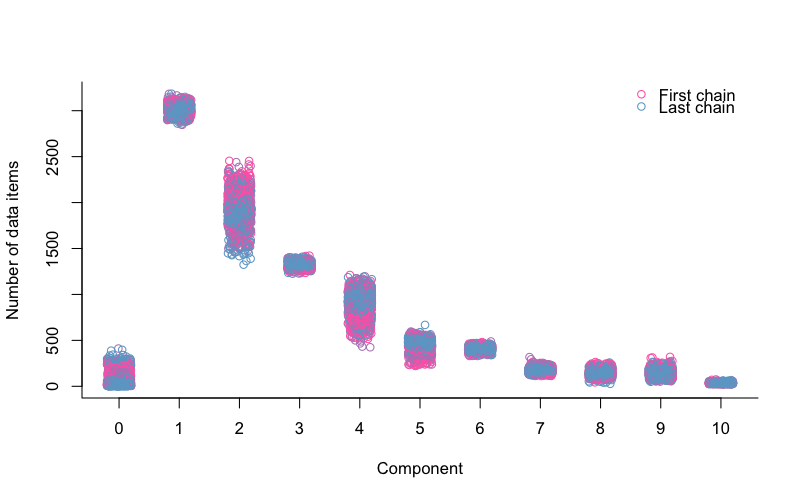

In [10]:
multi_output <- launch(data,base_dist,initial_clusters,burn,posterior_samples,chains,aa,ab)
multi_output_cluster_10 <- extract_components(multi_output)
plot_components_size(multi_output_cluster_10)

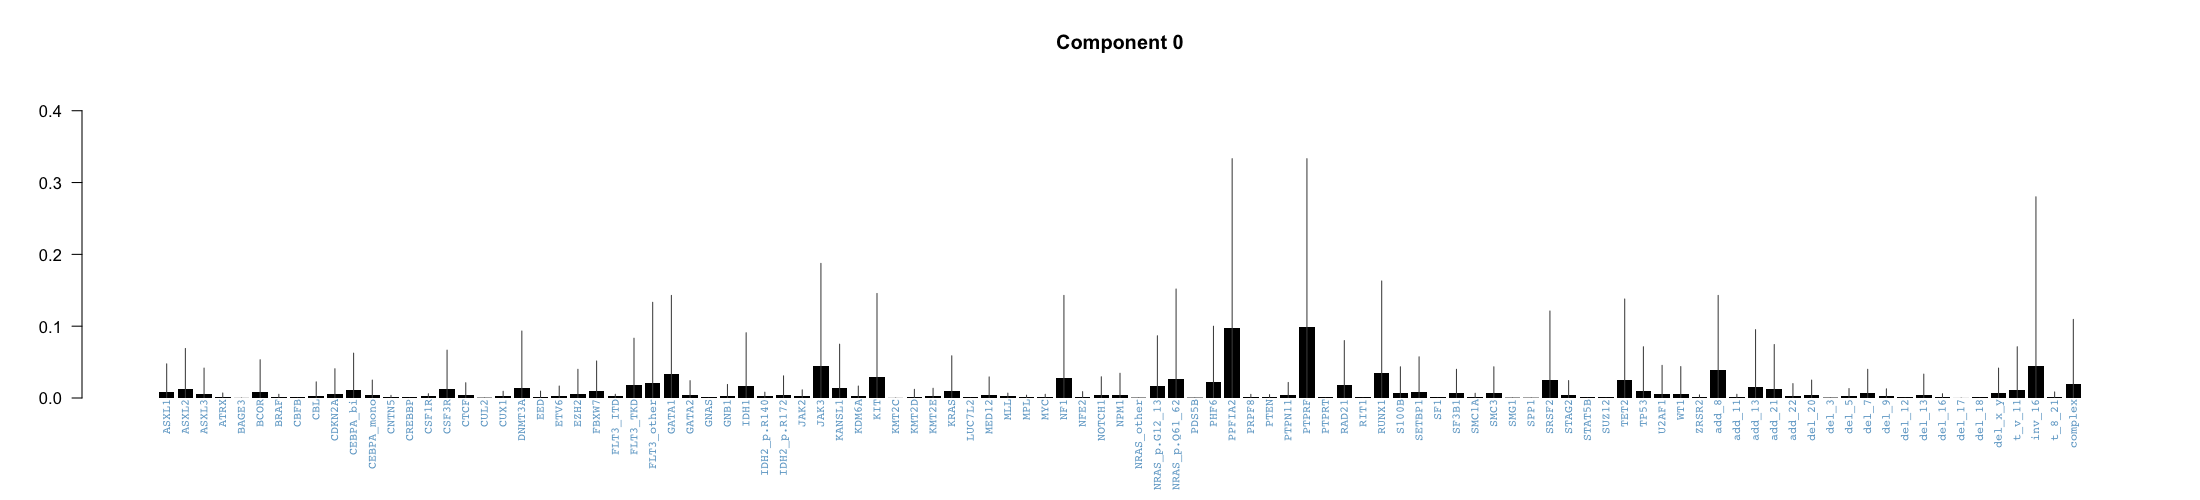

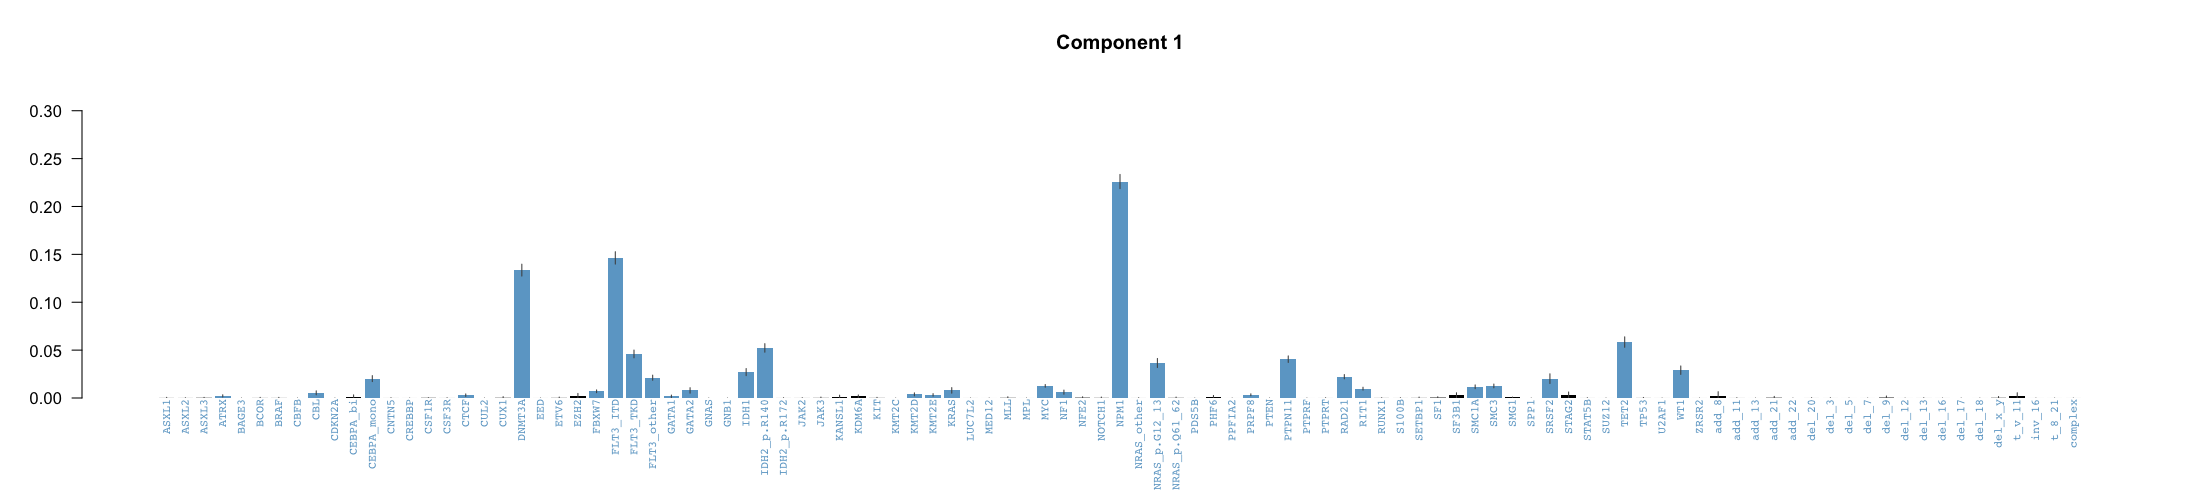

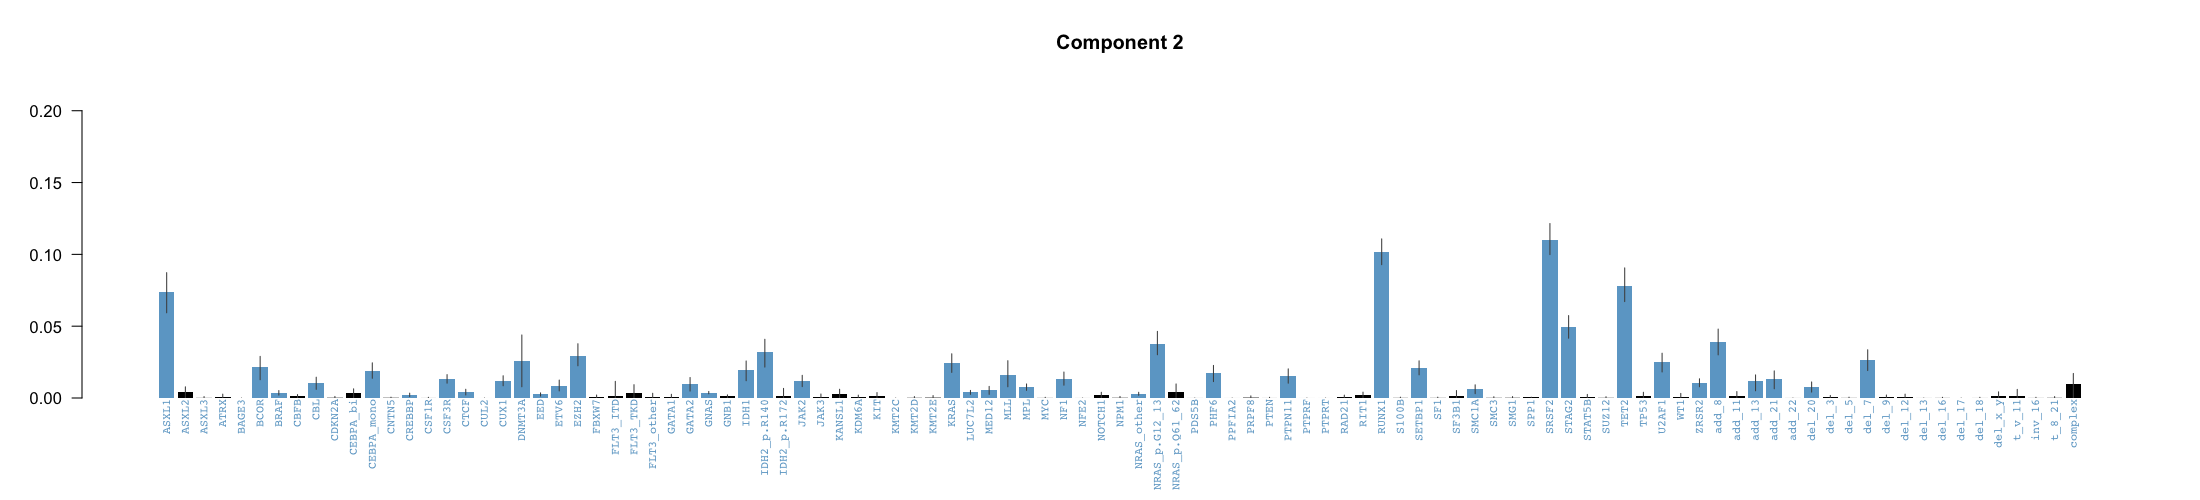

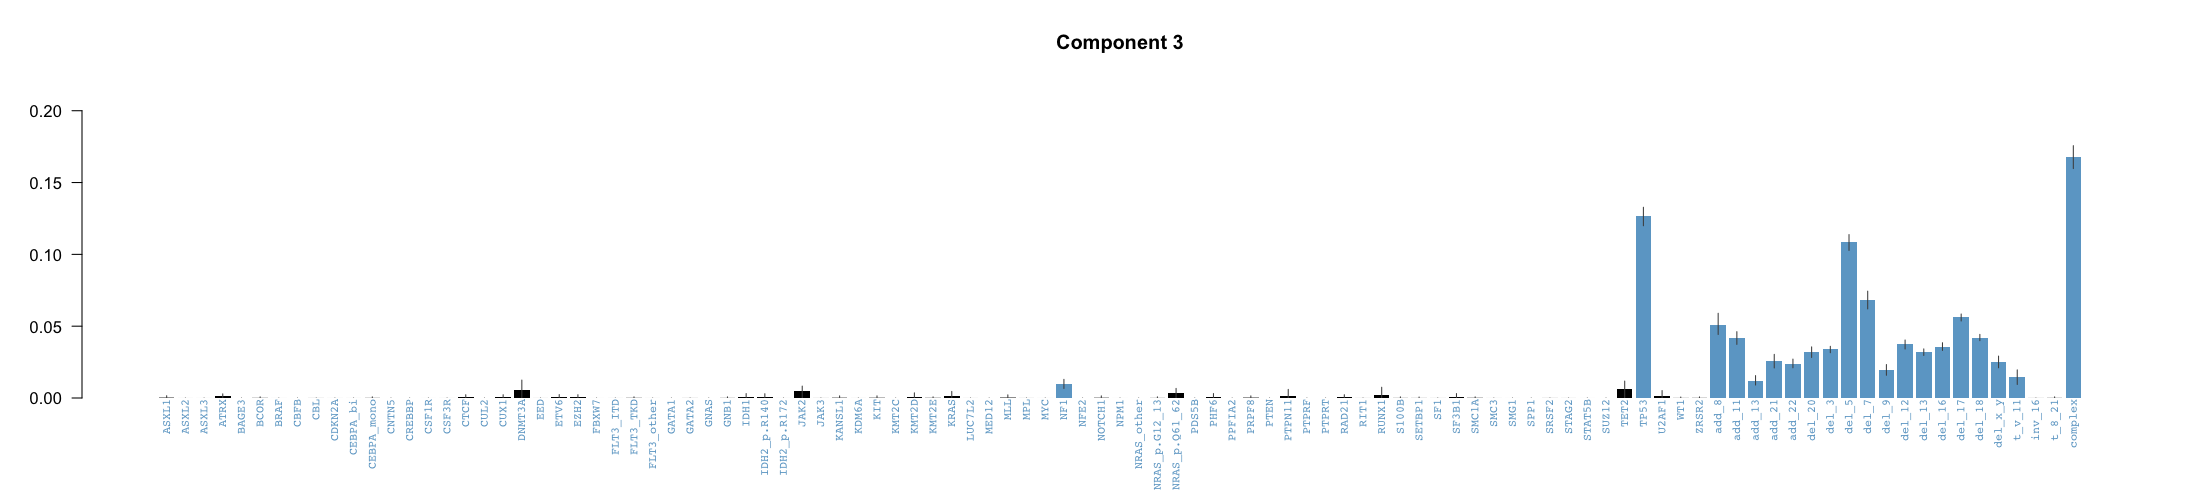

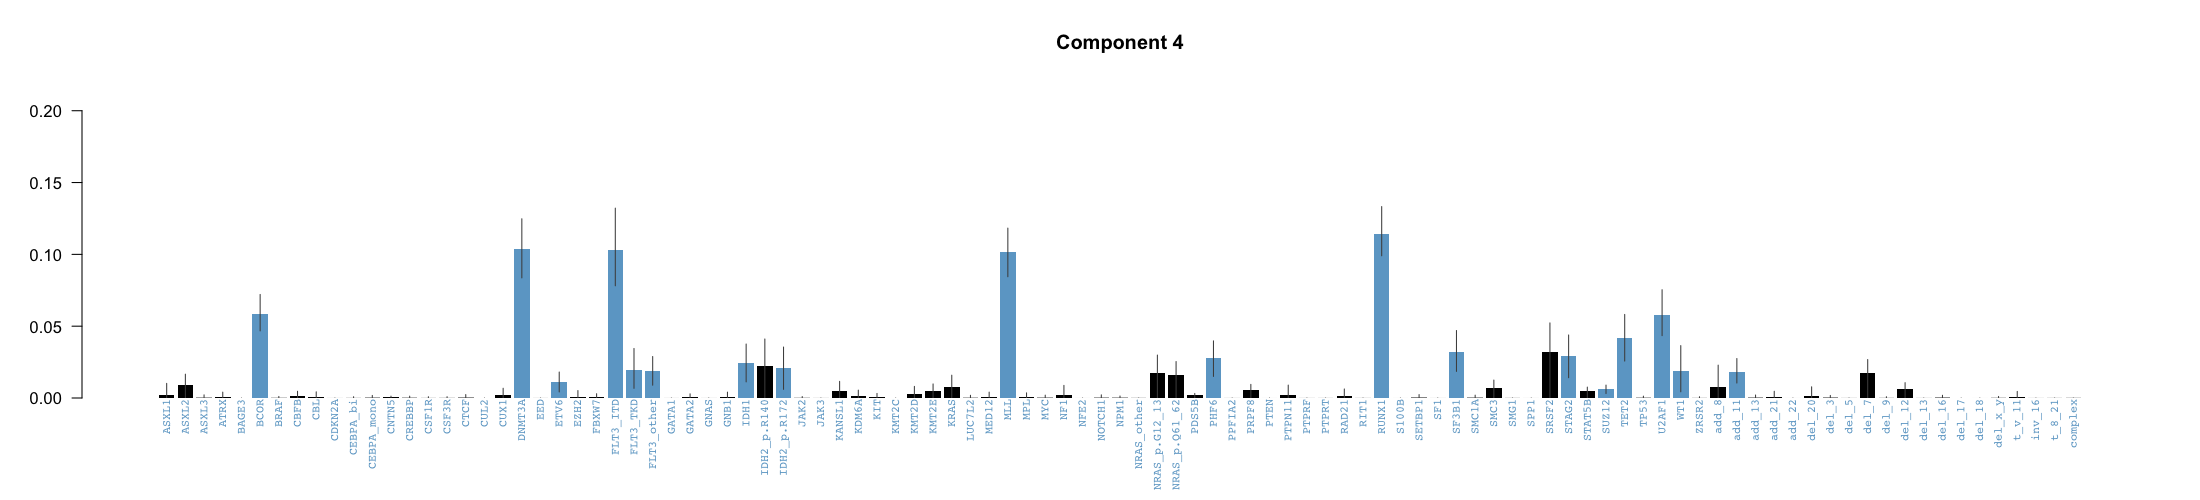

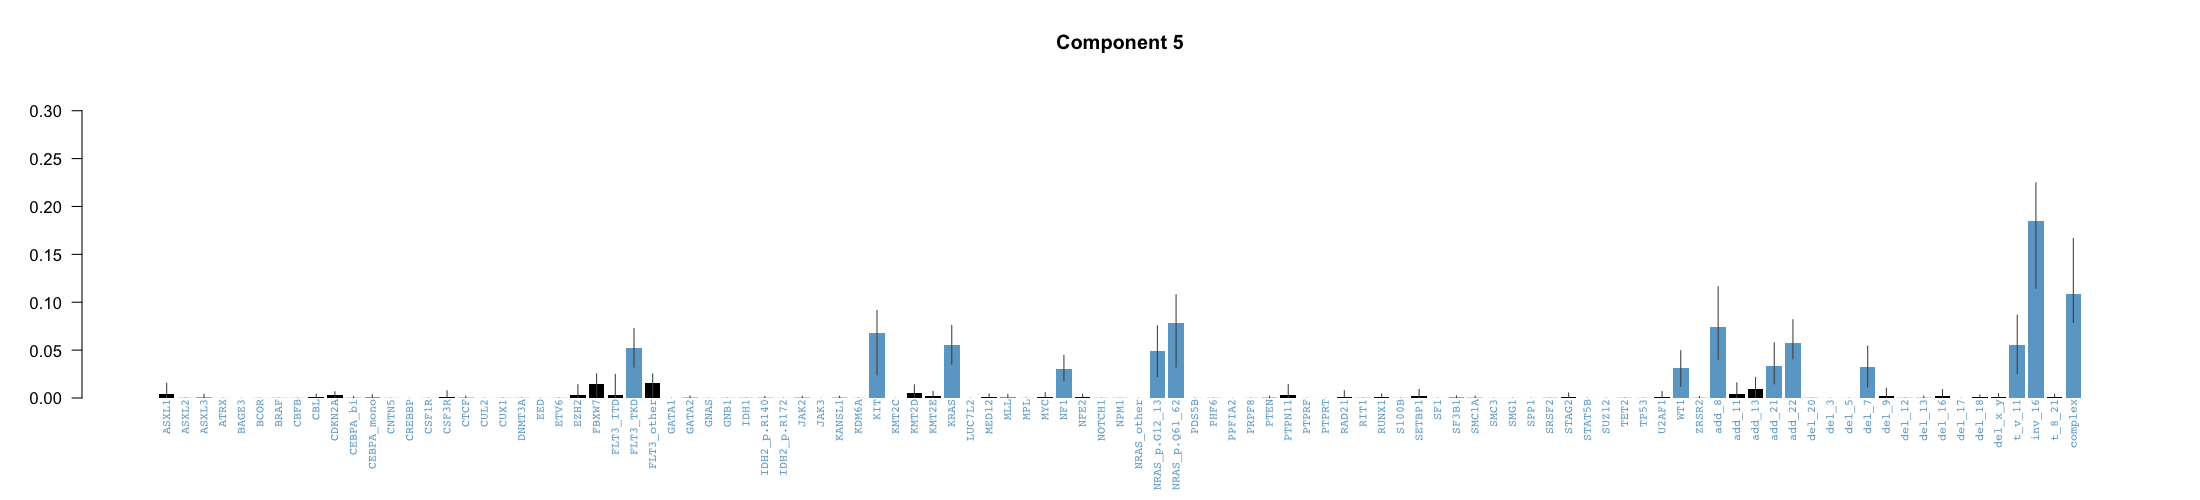

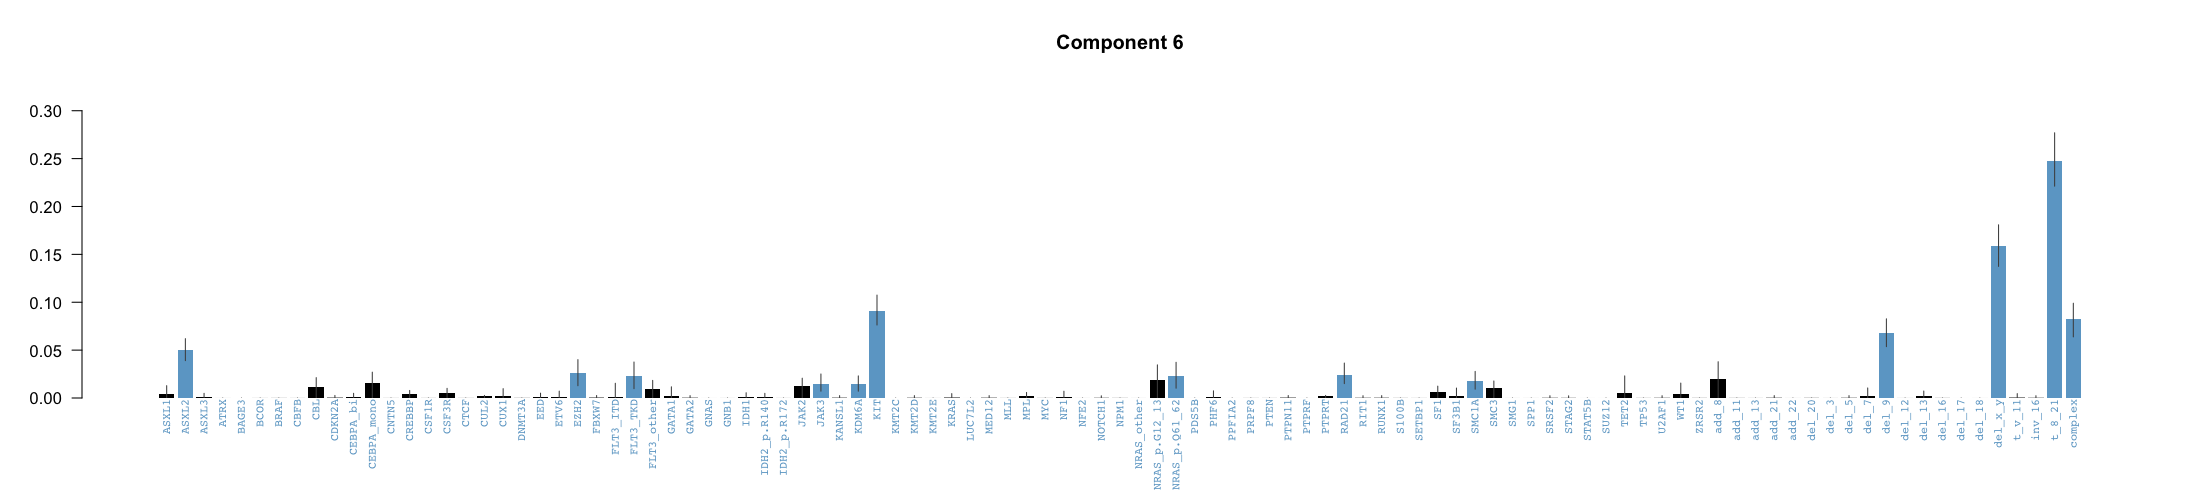

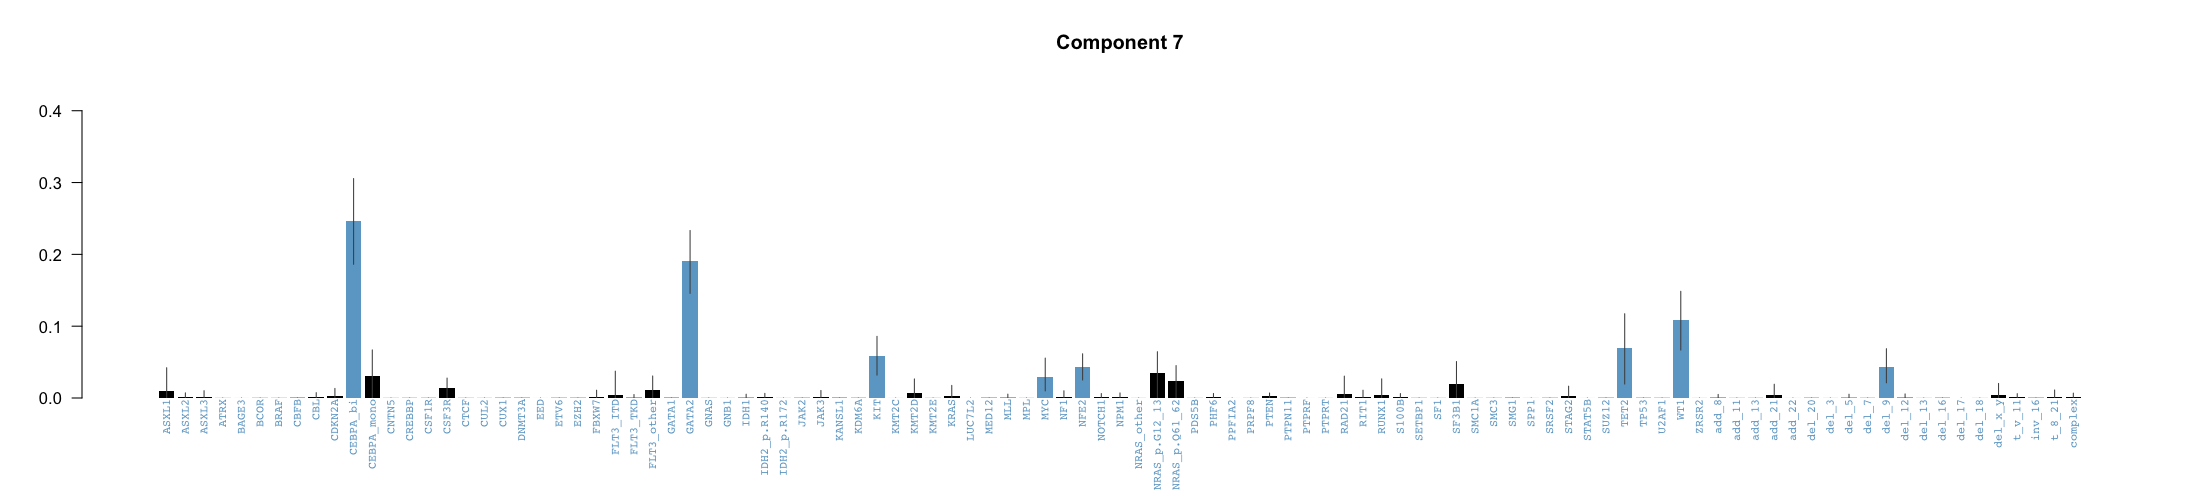

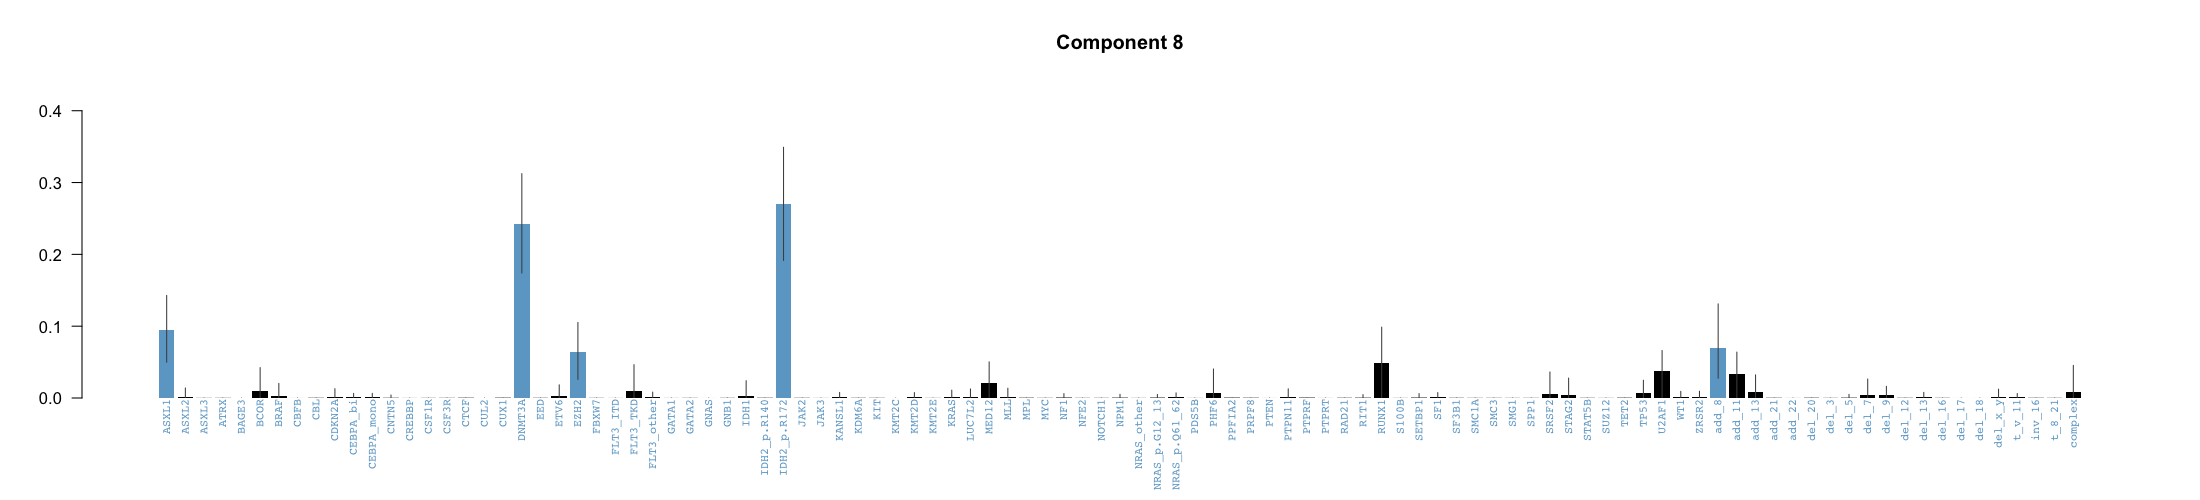

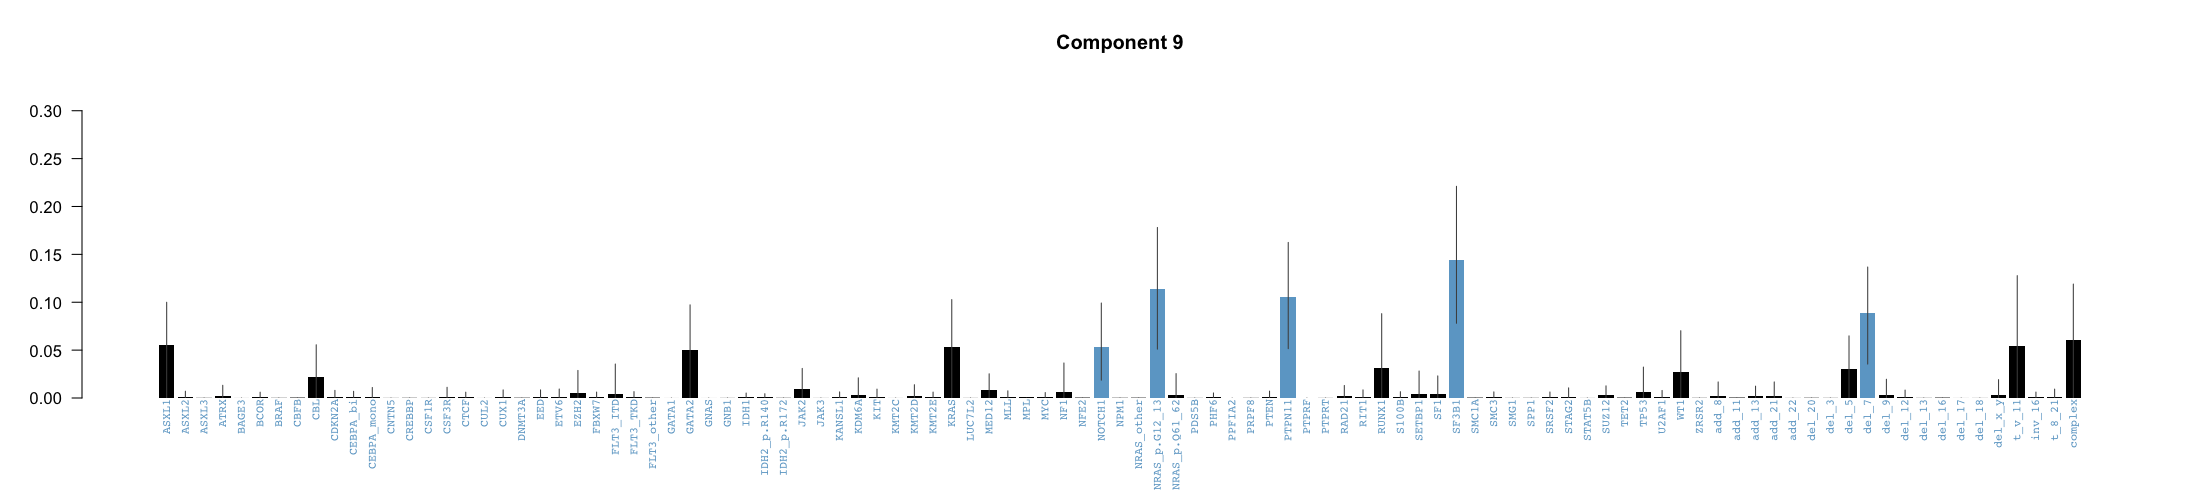

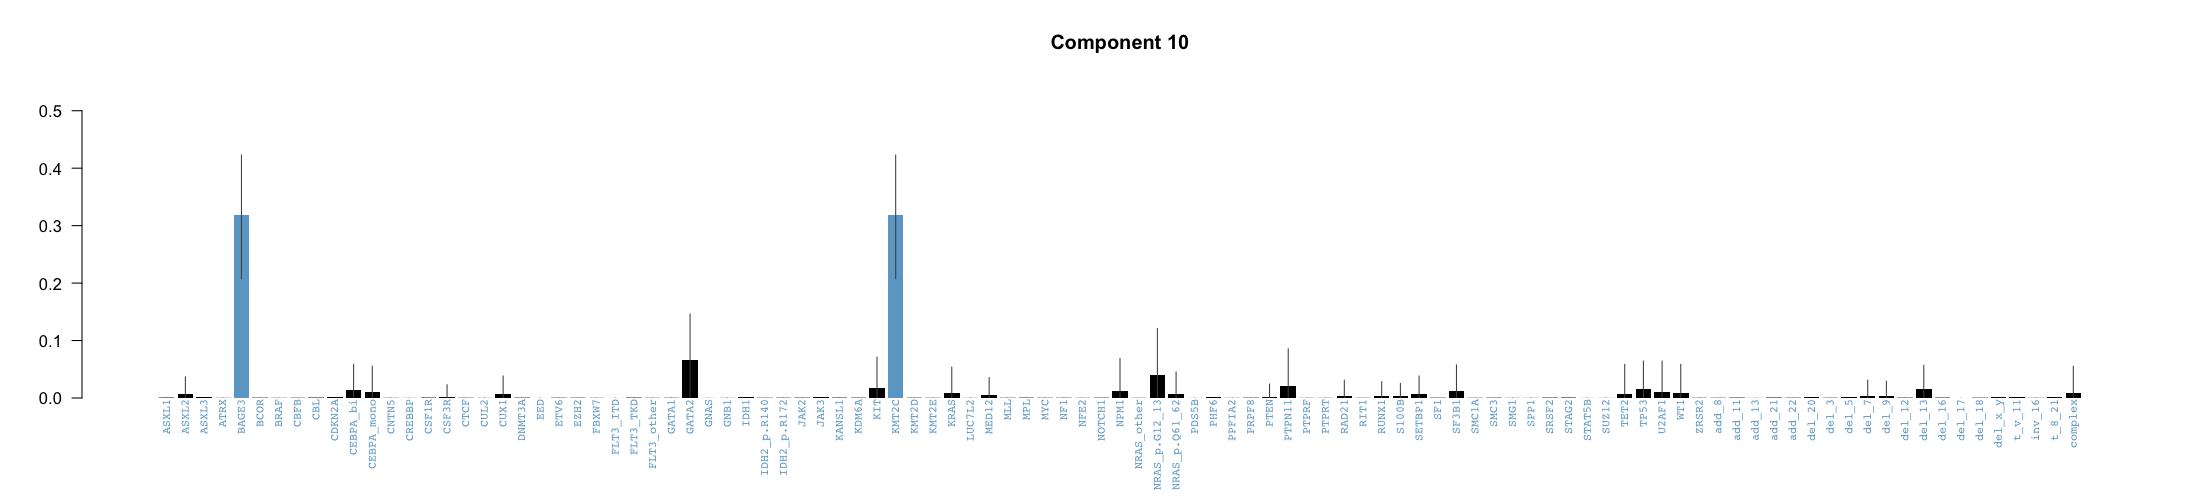

In [13]:
plot_category_distribution_by_component(multi_output_cluster_10, colnames(df_final))

In [14]:
dd_predicted_10_components <- get_prediction_result_dataframe(multi_output_cluster_10, df_final)
get_table(dd_predicted_10_components[,'predicted_component'])

Number of components: 10
Number of NA rows   : 65


values      count freq             
2  1            852  39.6279069767442 
3  2            446  20.7441860465116 
4  3            221  10.2790697674419 
5  4            195  9.06976744186047 
6  5            139  6.46511627906977 
7  6            114  5.30232558139535 
12 NaN           65  3.02325581395349 
8  7             46  2.13953488372093 
9  8             35  1.62790697674419 
10 9             27  1.25581395348837 
11 10             7  0.325581395348837
1  0              3  0.13953488372093 
13 -- total -- 2150  100%

In [15]:
write.table(dd_predicted_10_components,'dd_predicted_10_components.tsv',sep='\t',quote=F)

## Let's see with 9 components

In [16]:
data <- df_final
posterior_samples <- 350
initial_clusters <- 13
burn <- 7000
chains <- 3
base_dist <- unif
aa <- 1
ab <-1

Initialise HDP on a 2150 x 103 dataframe
  → create HDP structure... done!
  → add DP node for each patient... done!
  → assign the data to the nodes... done!
### Experiment 1 (seed = 100) ###
Activate HDP nodes and run posterior sampling
  → activate HDP nodes... done!
  → run posterior sampling...
[1] "7000 burn-in iterations in 0.3 mins"

### Experiment 2 (seed = 200) ###
Activate HDP nodes and run posterior sampling
  → activate HDP nodes... done!
  → run posterior sampling...
[1] "7000 burn-in iterations in 0.3 mins"

### Experiment 3 (seed = 300) ###
Activate HDP nodes and run posterior sampling
  → activate HDP nodes... done!
  → run posterior sampling...
[1] "7000 burn-in iterations in 0.3 mins"

Object of class hdpSampleMulti 
 Number of chains: 3 
 Total posterior samples: 1050 
 Components: NO. Run hdp_extract_components 
 ----------
 Final hdpState from first chain: 
Object of class hdpState 
 Number of DP nodes: 2151 
 Index of parent DP: 0 1 1 1 1 1 1 1 1 1 ...
 Number of

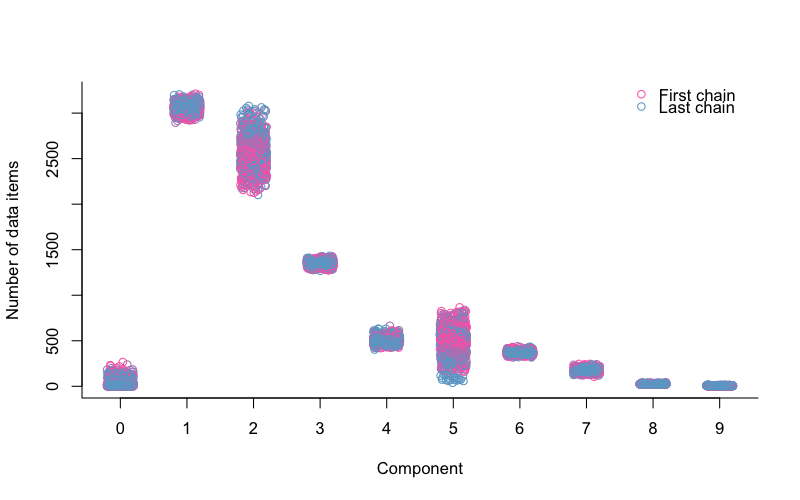

In [17]:
multi_output_9 <- launch(data,base_dist,initial_clusters,burn,posterior_samples,chains,aa,ab)
multi_output_cluster_9 <- extract_components(multi_output_9)
plot_components_size(multi_output_cluster_9)

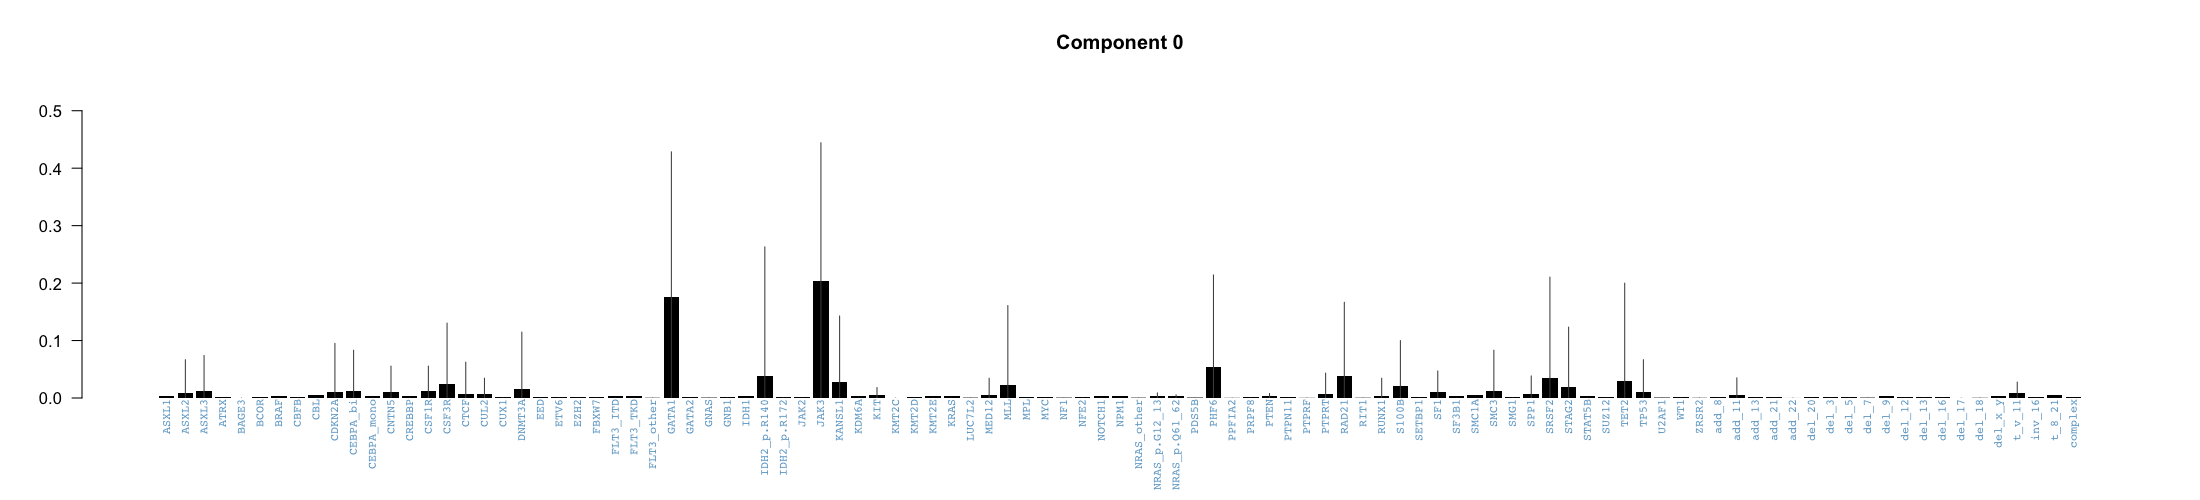

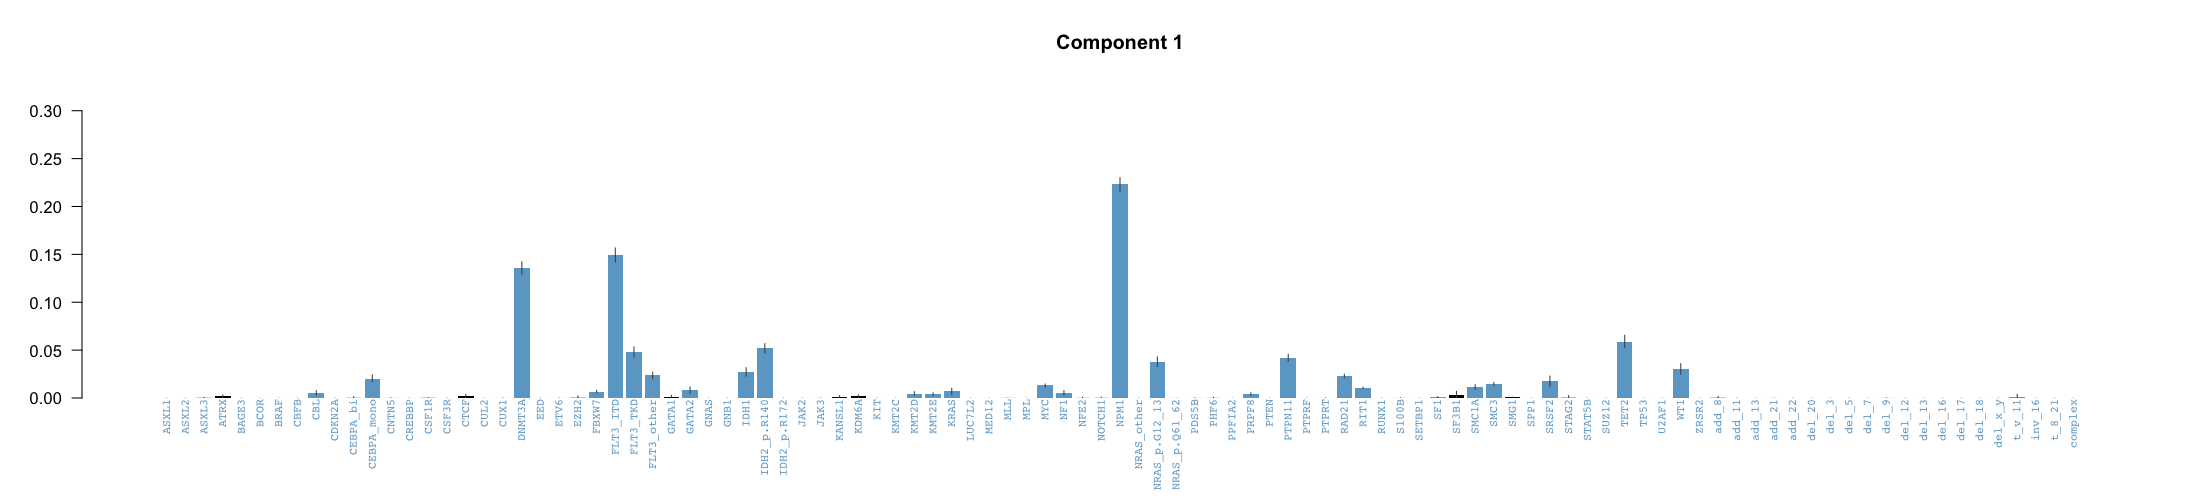

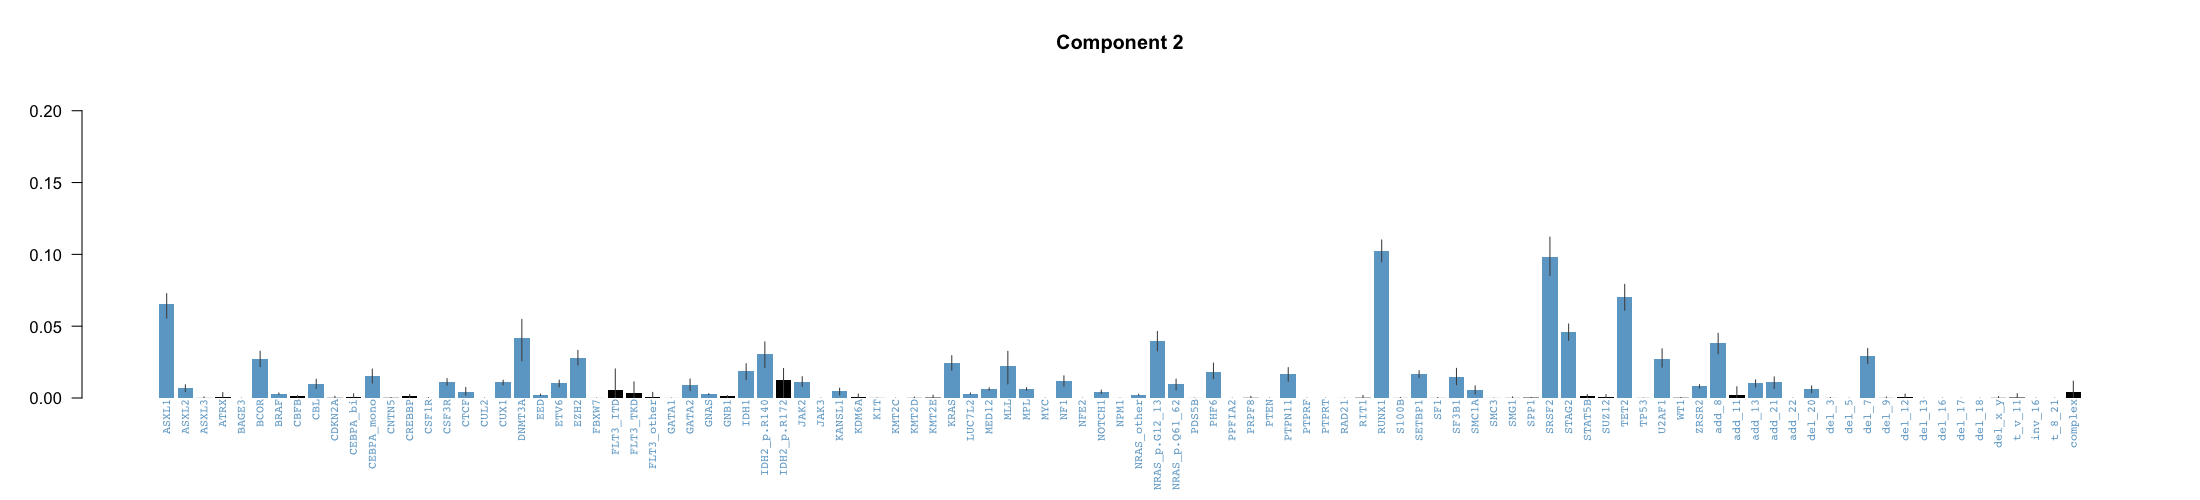

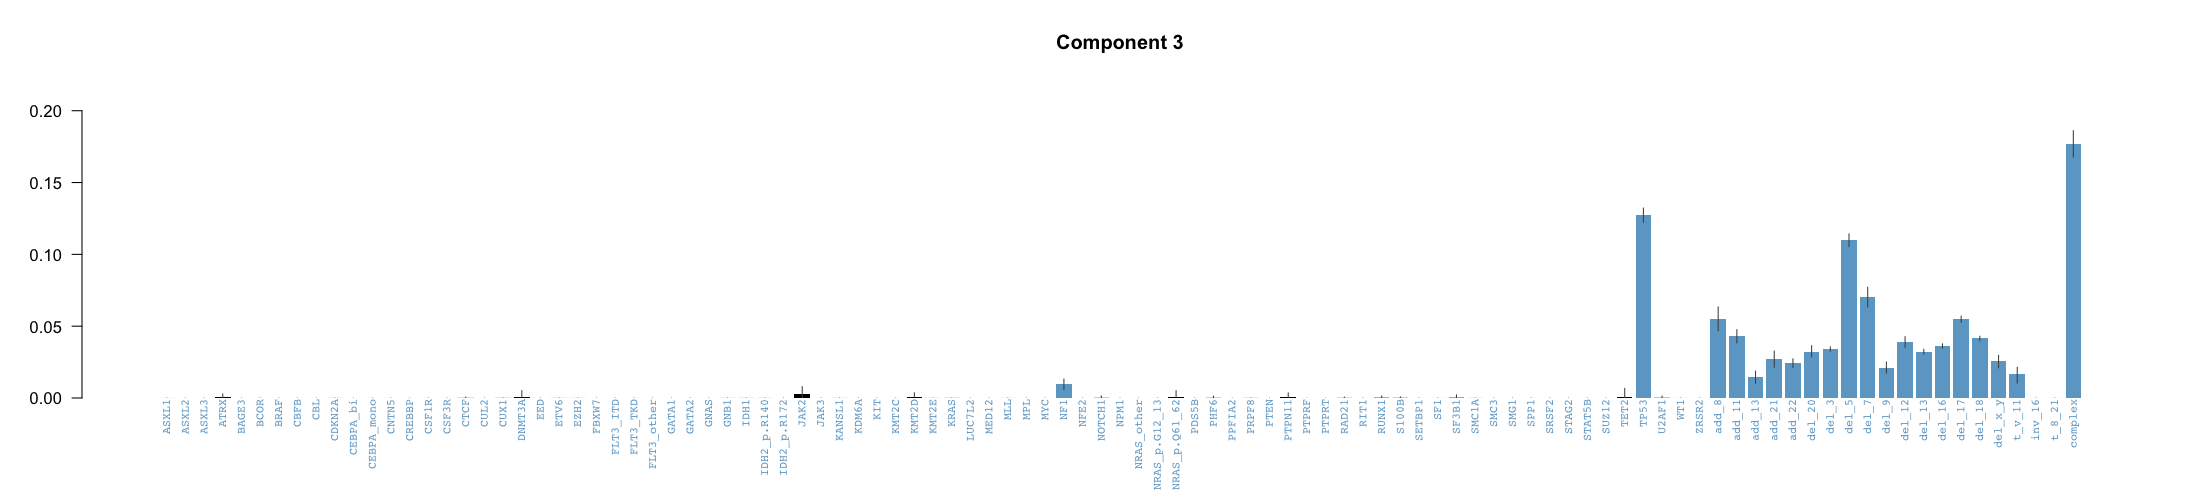

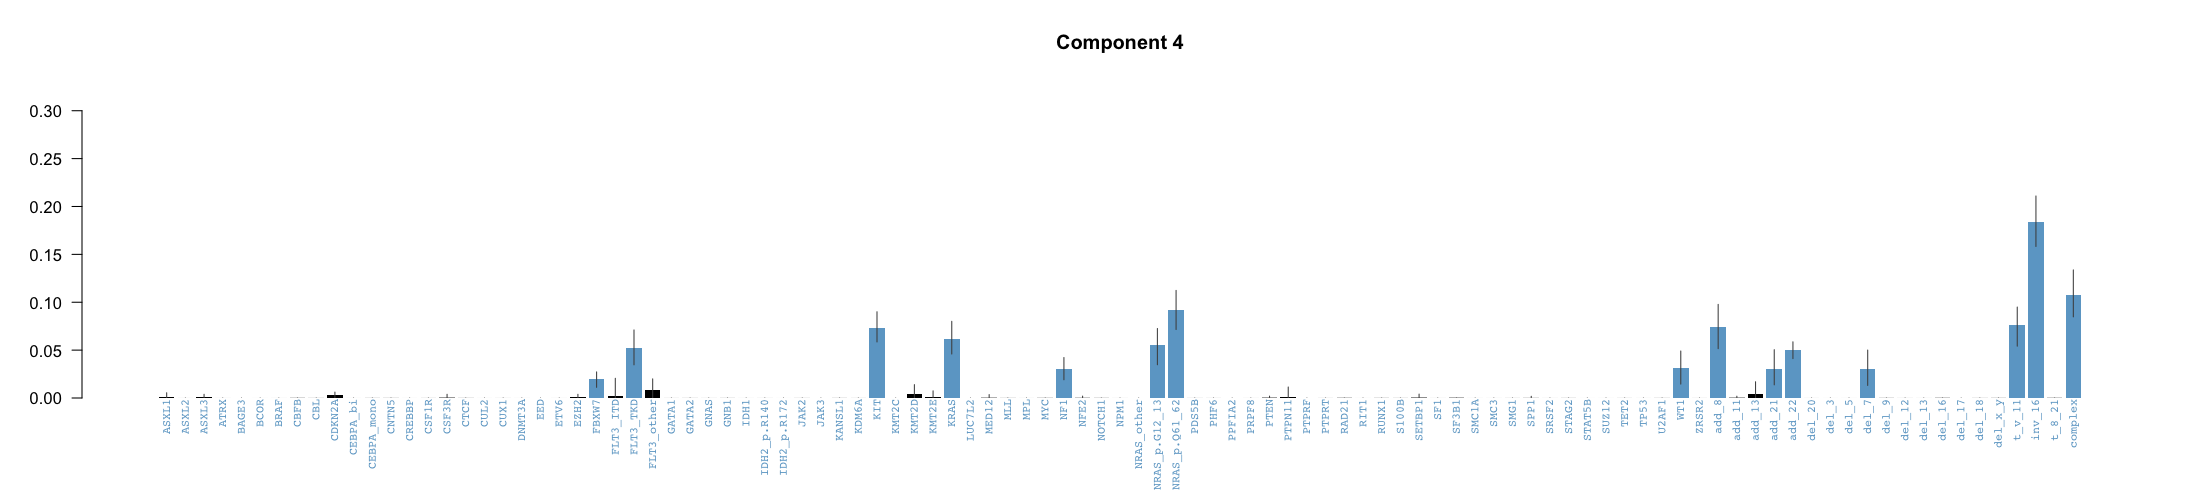

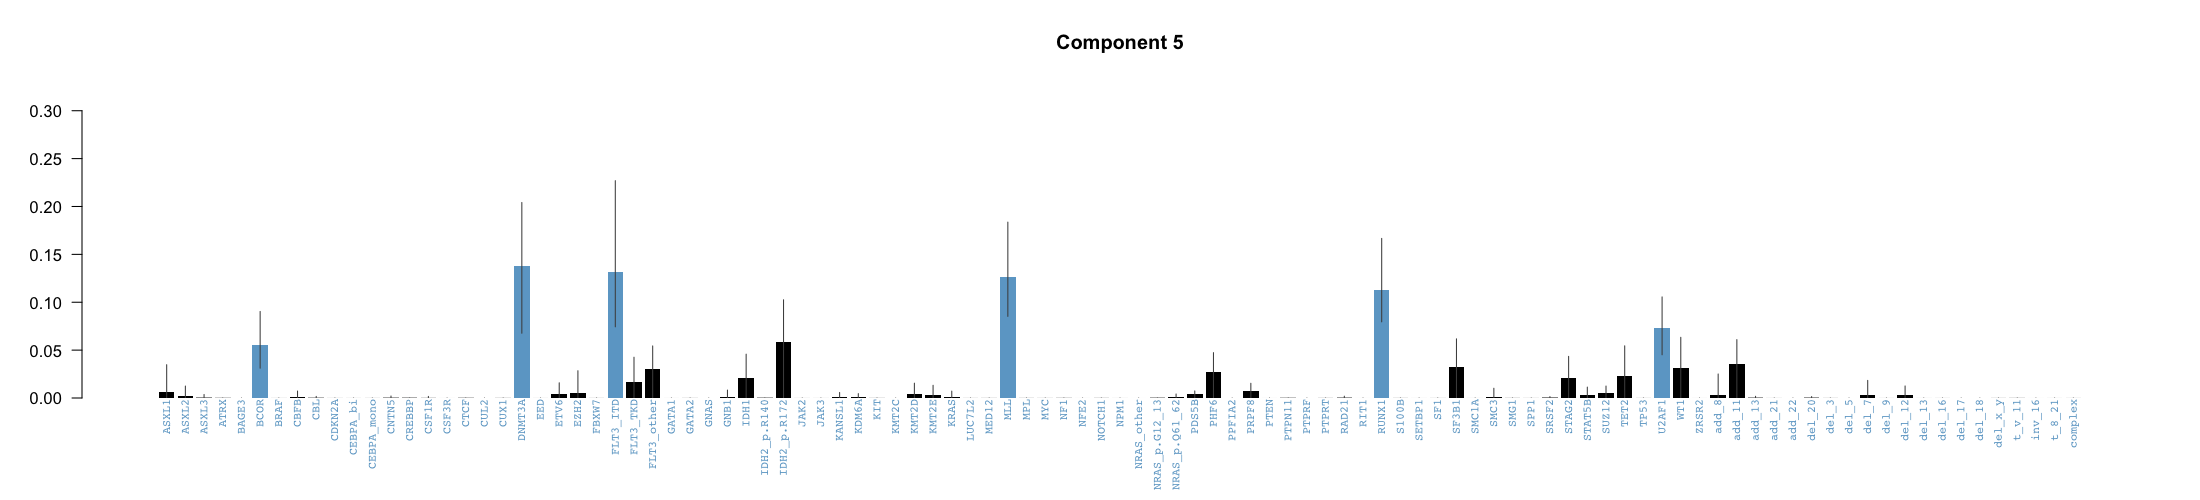

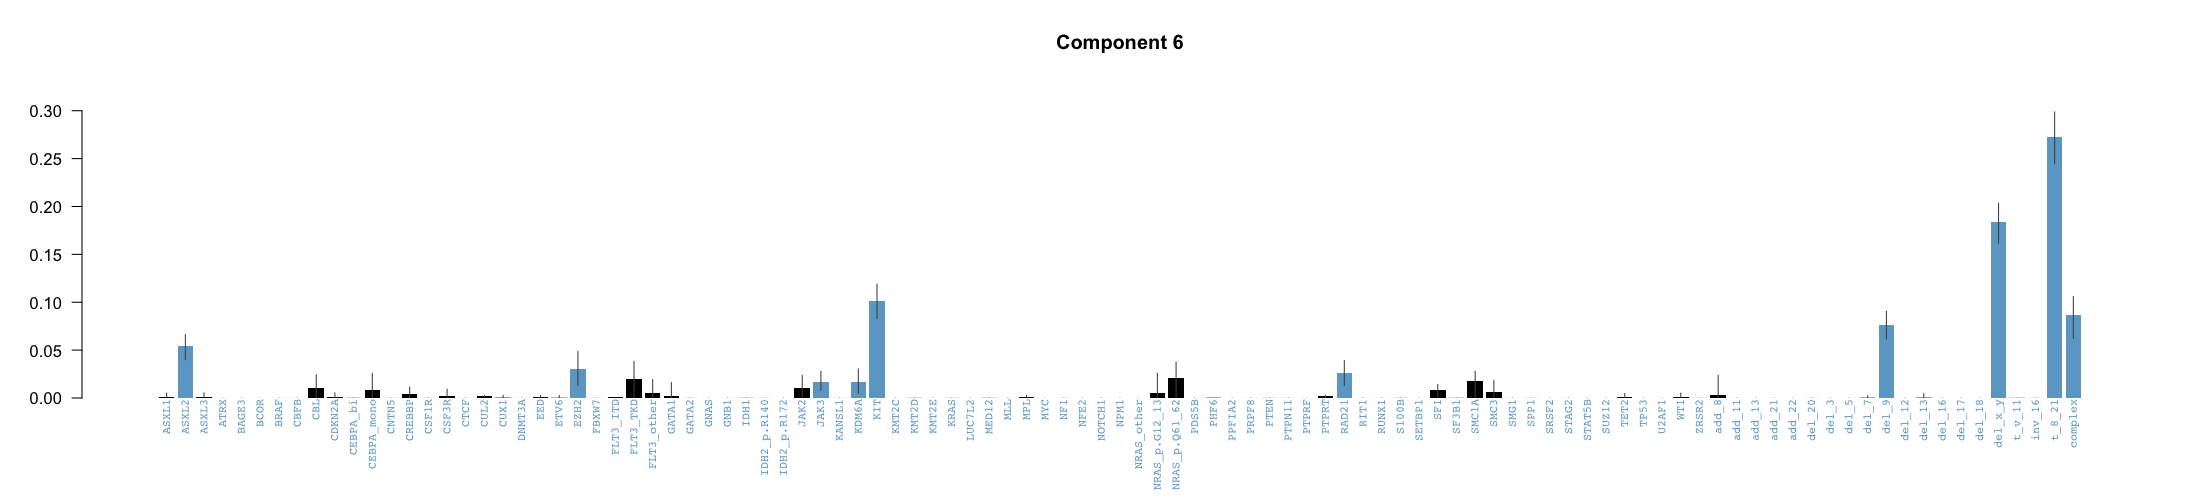

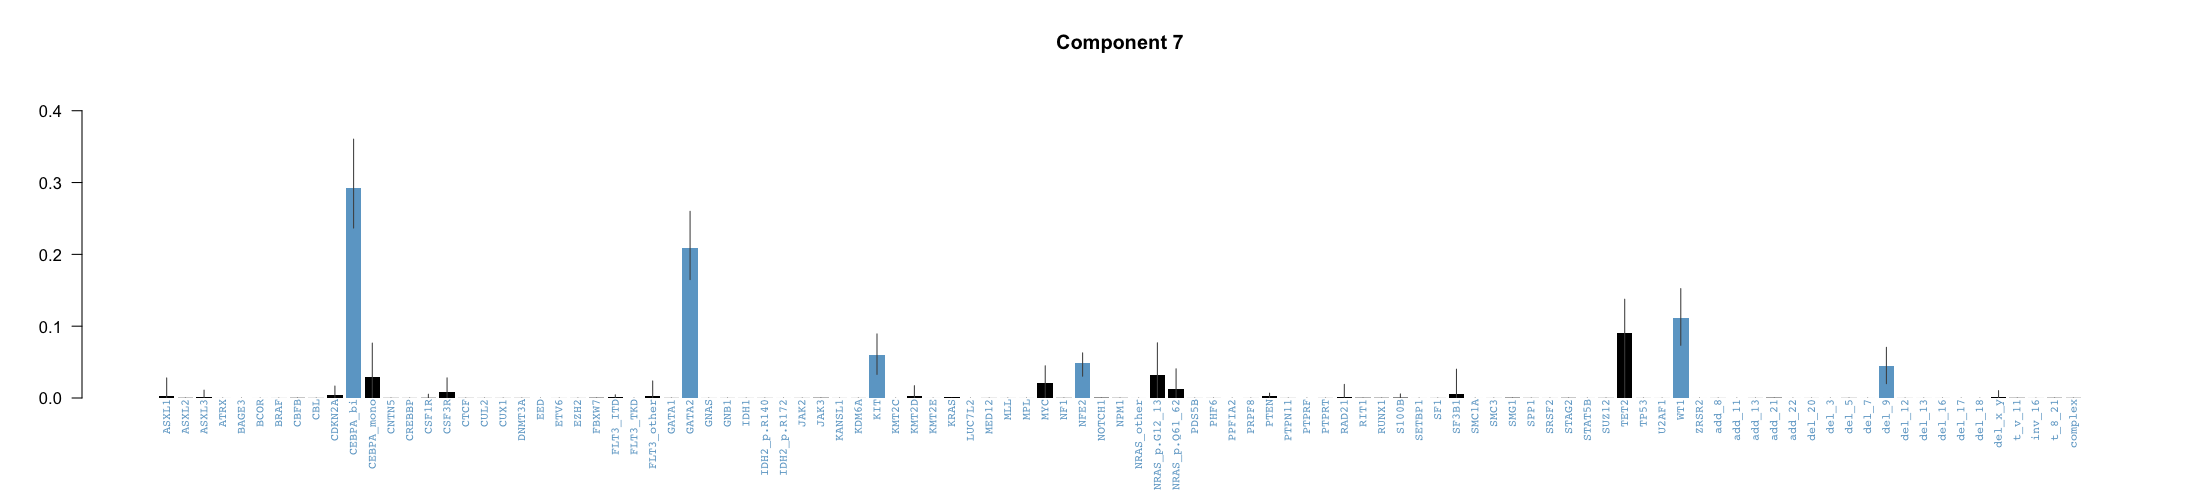

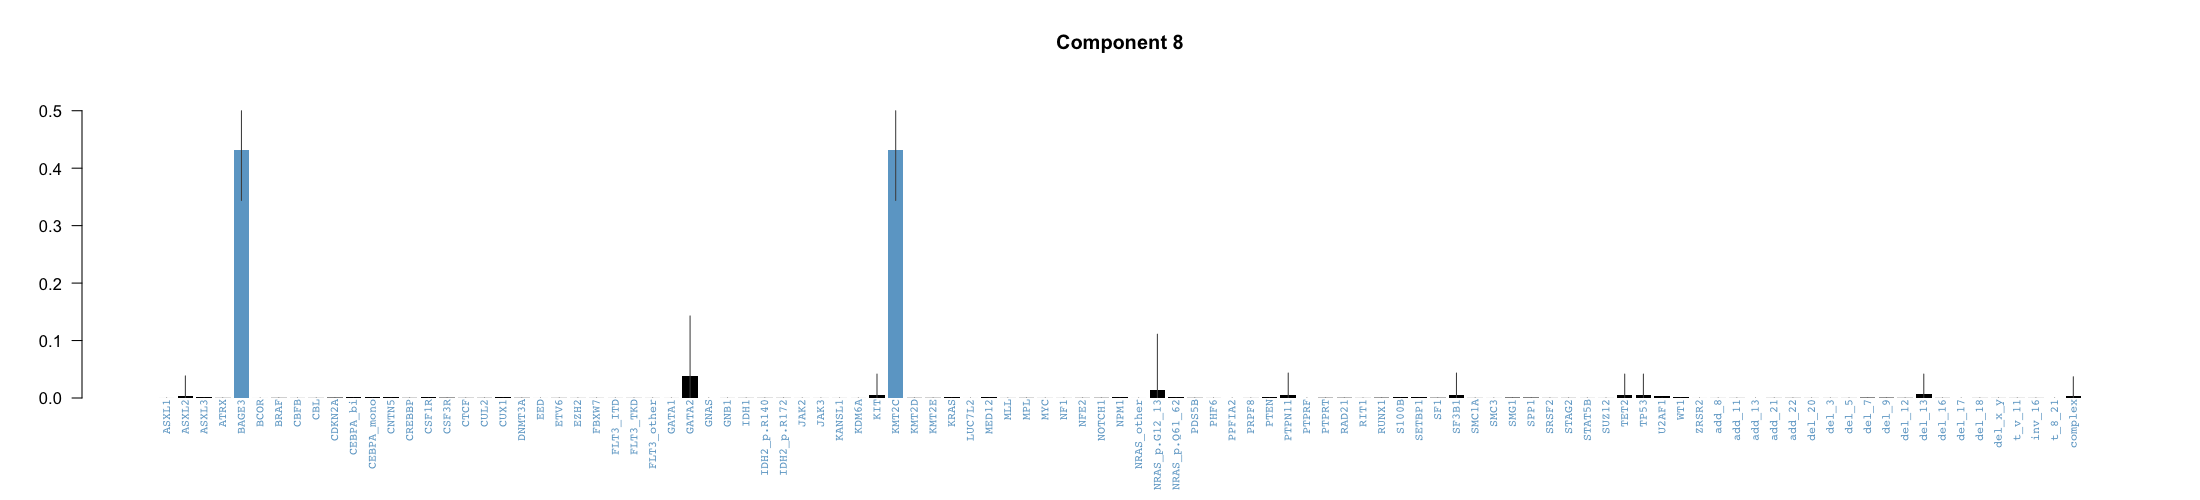

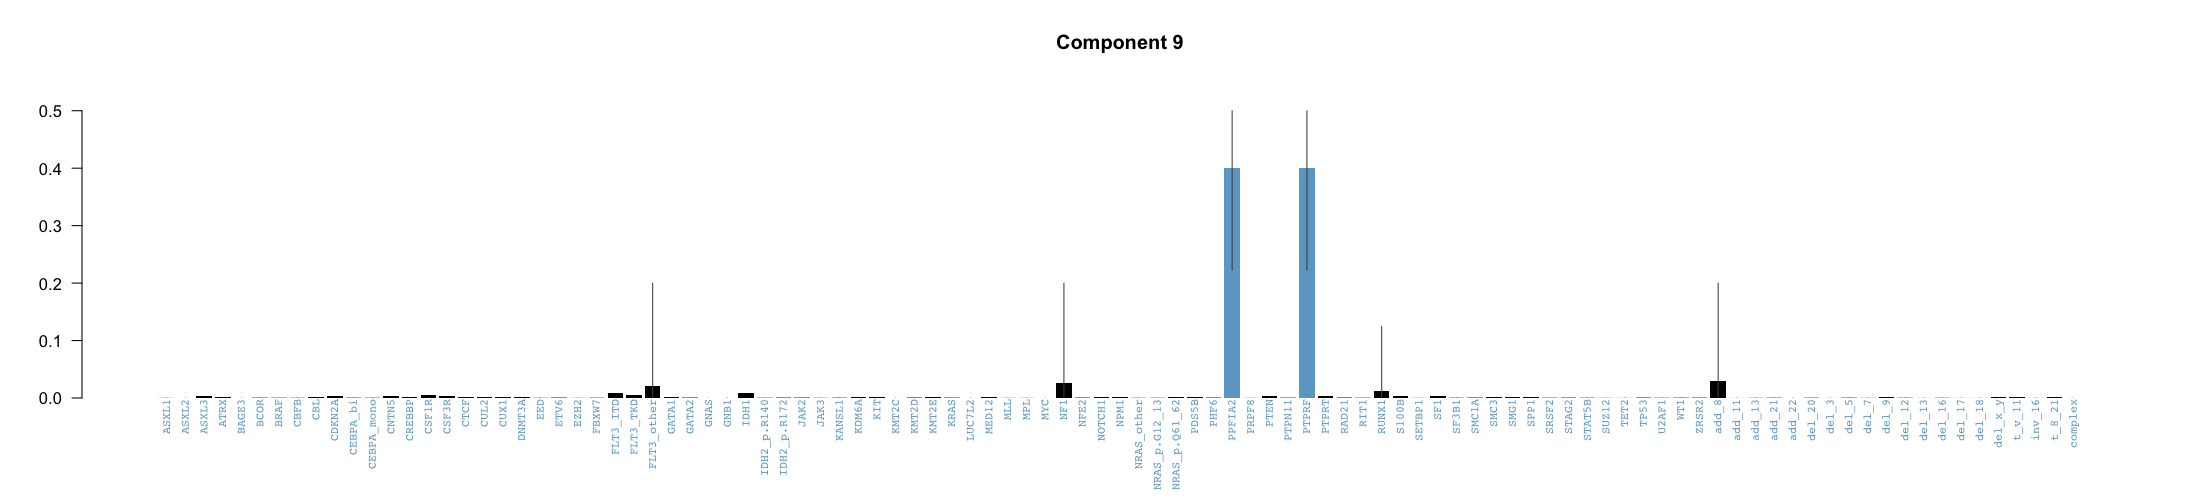

In [20]:
plot_category_distribution_by_component(multi_output_cluster_9, colnames(df_final))

In [21]:
dd_predicted_9_components <- get_prediction_result_dataframe(multi_output_cluster_9, df_final)
get_table(dd_predicted_9_components[,'predicted_component'])

Number of components: 9
Number of NA rows   : 65


values      count freq              
2  1            854  39.7209302325581  
3  2            605  28.1395348837209  
4  3            227  10.5581395348837  
5  4            145  6.74418604651163  
7  6            108  5.02325581395349  
6  5             89  4.13953488372093  
11 NaN           65  3.02325581395349  
8  7             47  2.18604651162791  
9  8              6  0.27906976744186  
1  0              3  0.13953488372093  
10 9              1  0.0465116279069767
12 -- total -- 2150  100%

In [22]:
write.table(dd_predicted_9_components,'dd_predicted_9_components.tsv',sep='\t',quote=F)

# Elli's request to look at the patients not belonging in cluster 2,3,5,6,9

In [221]:
df_clustered <- cbind(df_final, dd_predicted_10_components)

In [210]:
head(dd_predicted_10_components[,c('predicted_component','max_proba')])

predicted_component max_proba
1 1                   0.9679167
2 8                   0.7362500
3 4                   0.4681944
4 1                   0.7927778
5 4                   0.4870833
6 7                   0.9687500

## Keep only people belonging to clusters 1,3,4,8,10 and remove columns that we do not need

In [24]:
df_few_clustered <- df_clustered[df_clustered$predicted_component == 1 | df_clustered$predicted_component == 4 | df_clustered$predicted_component == 7 | df_clustered$predicted_component == 8 | df_clustered$predicted_component == 10,]
dim(df_few_clustered) 
df_few_clustered <- df_few_clustered[,1:103]
dim(df_few_clustered[,1:103] )

[1] 1135  116

[1] 1135  103

#### Let's delete also those features as they are all 0 in the whole subdataset

In [25]:
name <- as.vector(rownames(data.frame(colSums(df_few_clustered[,(colSums(df_few_clustered))==0]))))
name
df_few_clustered[name] <- list(NULL)
dim(df_few_clustered)

[1] "CBFB"       "CREBBP"     "CUL2"       "EED"        "GNAS"      
 [6] "GNB1"       "MPL"        "NRAS_other" "PTPRT"      "SPP1"      
[11] "del_17"     "inv_16"

[1] 1135   91

## Gridsearch to look at the clusters with this reduced dataset

In [23]:
###Binomial
num_cols = ncol(df_few_clustered)
bin <- function(x){
    set.seed(123)
  (rbinom(1, num_cols, mean(x))+1)/num_cols
}

###Normal

normal <- function(x){
    set.seed(234)
  abs(rnorm(1,mean(x),sd(x)))
}

###Poisson

poisson <- function(x){
    set.seed(123)
  (rpois(num_cols,1)+1)/num_cols
}

###Uniform equally over all columns

equally <- function(x){
    set.seed(123)
  1/num_cols
}

###Repet 1

repet <- function(x){
    set.seed(123)
  1
}

#sapply(df_gene,equally)
binomial <- unlist(sapply(df_few_clustered,bin))
gaussian <- unlist(sapply(df_few_clustered,normal))
pois <- as.numeric(unlist(sapply(df_few_clustered,poisson)))
unif <- unlist(sapply(df_few_clustered,equally))
repetition <- unlist(sapply(df_few_clustered,repet))

In [25]:
data <- df_few_clustered
posterior_samples <- c(200,300,350)
initial_clusters <- c(11,13,15,17)
burnin <- 5000
chains <- c(3,5)
space <- 20
base_dist <- list(gaussian,unif)
alphaa <-1
alphab <-1

In [ ]:
res_few <- hdp_gridsearch_yanis(data, posterior_samples, initial_clusters, burnin, chains, space,base_dist,alphaa,alphab)

In [27]:
write.table(res_few,"hdp_gridsearch_modif_few_cluster.tsv",sep='\t',quote=F)

In [26]:
new_table <- read.table("hdp_gridsearch_modif_few_cluster.tsv",sep = '\t' , header = T)

In [27]:
new_table[order(new_table$n_components),]

chains inicc n   burnin space base_dist alphaa alphab n_components
1  3      11    200 5000   20    gaussian  1      1      4           
3  3      11    300 5000   20    gaussian  1      1      4           
5  3      11    350 5000   20    gaussian  1      1      4           
13 3      15    200 5000   20    gaussian  1      1      4           
15 3      15    300 5000   20    gaussian  1      1      4           
17 3      15    350 5000   20    gaussian  1      1      4           
25 5      11    200 5000   20    gaussian  1      1      4           
27 5      11    300 5000   20    gaussian  1      1      4           
29 5      11    350 5000   20    gaussian  1      1      4           
31 5      13    200 5000   20    gaussian  1      1      4           
33 5      13    300 5000   20    gaussian  1      1      4           
35 5      13    350 5000   20    gaussian  1      1      4           
37 5      15    200 5000   20    gaussian  1      1      4           
39 5      15    300 5000   20    gaussian  1      1      4           
41 5      15    350 5000   20    gaussian  1      1      4           
2  3      11    200 5000   20    uniform   1      1      5           
4  3      11    300 5000   20    uniform   1      1      5           
6  3      11    350 5000   20    uniform   1      1      5           
7  3      13    200 5000   20    gaussian  1      1      5           
8  3      13    200 5000   20    uniform   1      1      5           
9  3      13    300 5000   20    gaussian  1      1      5           
11 3      13    350 5000   20    gaussian  1      1      5           
19 3      17    200 5000   20    gaussian  1      1      5           
21 3      17    300 5000   20    gaussian  1      1      5           
22 3      17    300 5000   20    uniform   1      1      5           
23 3      17    350 5000   20    gaussian  1      1      5           
24 3      17    350 5000   20    uniform   1      1      5           
26 5      11    200 5000   20    uniform   1      1      5           
28 5      11    300 5000   20    uniform   1      1      5           
30 5      11    350 5000   20    uniform   1      1      5           
38 5      15    200 5000   20    uniform   1      1      5           
40 5      15    300 5000   20    uniform   1      1      5           
43 5      17    200 5000   20    gaussian  1      1      5           
45 5      17    300 5000   20    gaussian  1      1      5           
46 5      17    300 5000   20    uniform   1      1      5           
47 5      17    350 5000   20    gaussian  1      1      5           
10 3      13    300 5000   20    uniform   1      1      6           
12 3      13    350 5000   20    uniform   1      1      6           
14 3      15    200 5000   20    uniform   1      1      6           
16 3      15    300 5000   20    uniform   1      1      6           
18 3      15    350 5000   20    uniform   1      1      6           
20 3      17    200 5000   20    uniform   1      1      6           
32 5      13    200 5000   20    uniform   1      1      6           
34 5      13    300 5000   20    uniform   1      1      6           
36 5      13    350 5000   20    uniform   1      1      6           
42 5      15    350 5000   20    uniform   1      1      6           
44 5      17    200 5000   20    uniform   1      1      6           
48 5      17    350 5000   20    uniform   1      1      6           
   component_0 assignment Davies_Bouldin Silhouette
1  10          1105       2.887098       0.09139958
3  10          1107       2.886949       0.09125626
5   9          1107       2.840702       0.09186841
13 21          1091       2.824091       0.10430932
15 24          1096       3.035451       0.10031346
17 24          1100       3.035451       0.10031346
25 10          1103       2.920732       0.09066586
27 11          1103       2.940661       0.09065284
29  9          1102       2.838733       0.09193869
31 22          1101       2.953258       0.10028267
3

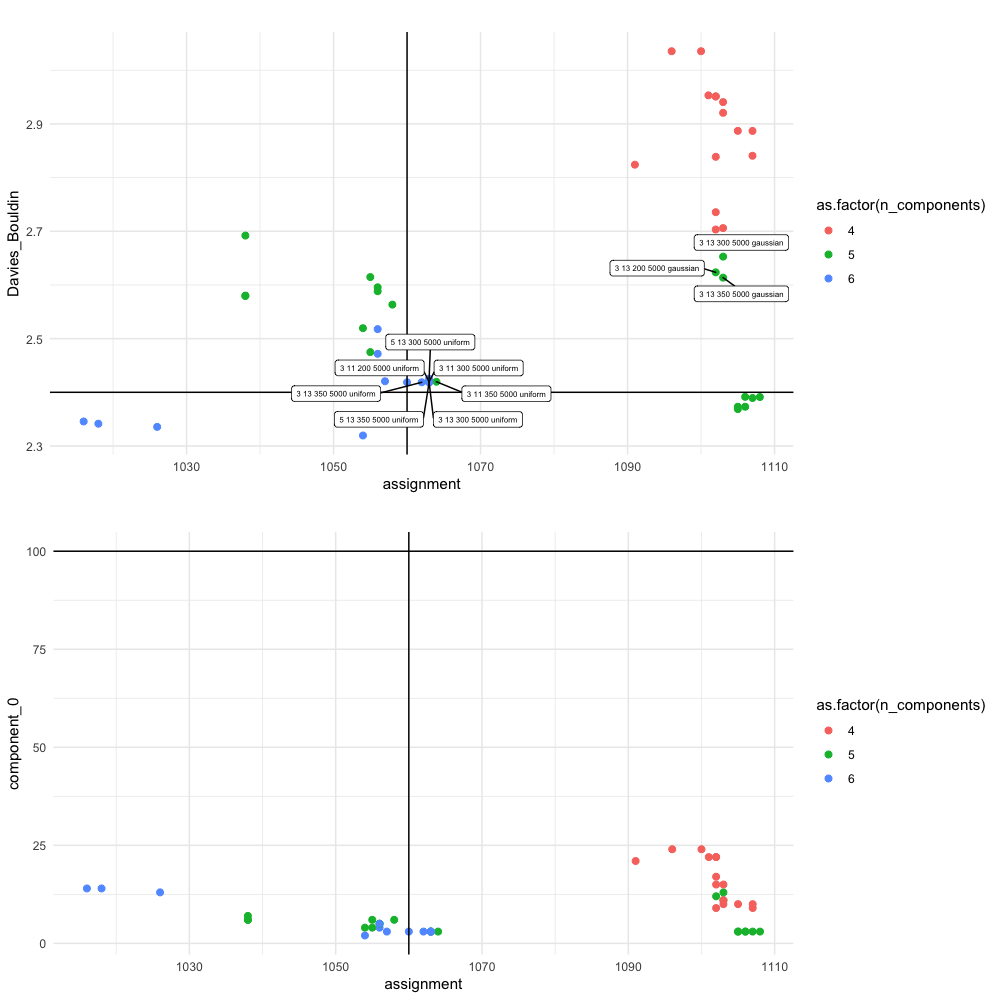

In [28]:
set_notebook_plot_size(10, 10)

# add labels
#new_table_S_DB <- new_table[new_table$assignment > 1800 & new_table$n_components > 8,]
#new_table_S_DB$good <- ifelse(new_table_S_DB$assignment > 1800 & new_table$n_components > 8, paste(new_table_S_DB$chains,new_table_S_DB$inicc,new_table_S_DB$n,new_table_S_DB$burnin,new_table_S_DB$base_dist),'')

new_table_S_DB <- new_table[new_table$assignment > 1060 & new_table$Davies_Bouldin > 2.4,]
new_table_S_DB$good <- ifelse(new_table_S_DB$n_components>=5 & new_table_S_DB$assignment > 1060 & new_table_S_DB$Davies_Bouldin > 2.4, paste(new_table_S_DB$chains,new_table_S_DB$inicc,new_table_S_DB$n,new_table_S_DB$burnin,new_table_S_DB$base_dist),'')

new_table_A_0 <- new_table[new_table$assignment > 1270 & new_table$component_0 < 100,]
new_table_A_0$good <- ifelse(new_table_S_DB$n_components>=5 & new_table_A_0$assignment > 1270 & new_table_A_0$component_0 < 100, paste(new_table_A_0$chains,new_table_A_0$inicc,new_table_A_0$n,new_table_A_0$burnin,new_table_S_DB$base_dist),'')

g1 <- ggplot(new_table) +
        geom_point(aes(x = assignment, y = Davies_Bouldin, col = as.factor(n_components)), size = 2) +
        #scale_color_manual(values=c("red", "orange", "green",'blue',"dark", "orange", "green",'blue',"red", "orange", "green",'blue'), labels = 0:11, name = 'Number of components') +
        ggtitle('') +
        geom_hline(yintercept = 2.4) + #we want higher than 3rd quart
        geom_vline(xintercept = 1060) + #we want higher than 3rd quart
        geom_label_repel(aes(x = assignment, y = Davies_Bouldin, label=good), size=2, data=new_table_S_DB)

g2 <- ggplot(new_table) +
        geom_point(aes(x = assignment, y = component_0, col = as.factor(n_components)), size = 2) +
        #scale_color_manual(values=c("red", "orange", "green",'blue'),labels = 8:11, name = 'Number of components') +
        ggtitle('') +
        geom_hline(yintercept = 100) + #we want lower than 1st quart
        geom_vline(xintercept = 1060) + #we want higher than 3rd quart
        geom_label_repel(aes(x = assignment, y = component_0, label=good), size=2, data=new_table_A_0)
grid.arrange(g1, g2, ncol = 1)

In [29]:
###Binomial
num_cols = ncol(df_few_clustered)
bin <- function(x){
    set.seed(123)
  (rbinom(1, num_cols, mean(x))+1)/num_cols
}

###Normal

normal <- function(x){
    set.seed(234)
  abs(rnorm(1,mean(x),sd(x)))
}

###Poisson

poisson <- function(x){
    set.seed(123)
  (rpois(num_cols,1)+1)/num_cols
}

###Uniform equally over all columns

equally <- function(x){
    set.seed(123)
  1/num_cols
}

###Repet 1

repet <- function(x){
    set.seed(123)
  1
}

#sapply(df_gene,equally)
binomial <- unlist(sapply(df_few_clustered,bin))
gaussian <- unlist(sapply(df_few_clustered,normal))
pois <- as.numeric(unlist(sapply(df_few_clustered,poisson)))
unif <- unlist(sapply(df_few_clustered,equally))
repetition <- unlist(sapply(df_few_clustered,repet))

## Let's look at the results with 6 components

In [30]:
data <- df_few_clustered
posterior_samples <- 350
initial_clusters <- 15
burn <- 5000
chains <- 5
base_dist <- unif
aa <- 1
ab <-1

Initialise HDP on a 1135 x 91 dataframe
  → create HDP structure... done!
  → add DP node for each patient... done!
  → assign the data to the nodes... done!
### Experiment 1 (seed = 100) ###
Activate HDP nodes and run posterior sampling
  → activate HDP nodes... done!
  → run posterior sampling...
[1] "5000 burn-in iterations in 0.2 mins"

### Experiment 2 (seed = 200) ###
Activate HDP nodes and run posterior sampling
  → activate HDP nodes... done!
  → run posterior sampling...
[1] "5000 burn-in iterations in 0.2 mins"

### Experiment 3 (seed = 300) ###
Activate HDP nodes and run posterior sampling
  → activate HDP nodes... done!
  → run posterior sampling...
[1] "5000 burn-in iterations in 0.1 mins"

### Experiment 4 (seed = 400) ###
Activate HDP nodes and run posterior sampling
  → activate HDP nodes... done!
  → run posterior sampling...
[1] "5000 burn-in iterations in 0.2 mins"

### Experiment 5 (seed = 500) ###
Activate HDP nodes and run posterior sampling
  → activate HDP nodes

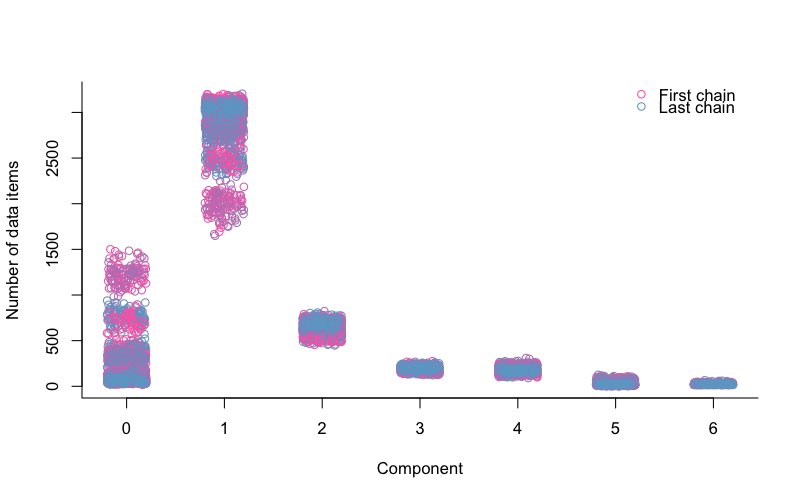

In [31]:
multi_output_6 <- launch(data,base_dist,initial_clusters,burn,posterior_samples,chains,aa,ab)
multi_output_cluster_6 <- extract_components(multi_output_6)
plot_components_size(multi_output_cluster_6)

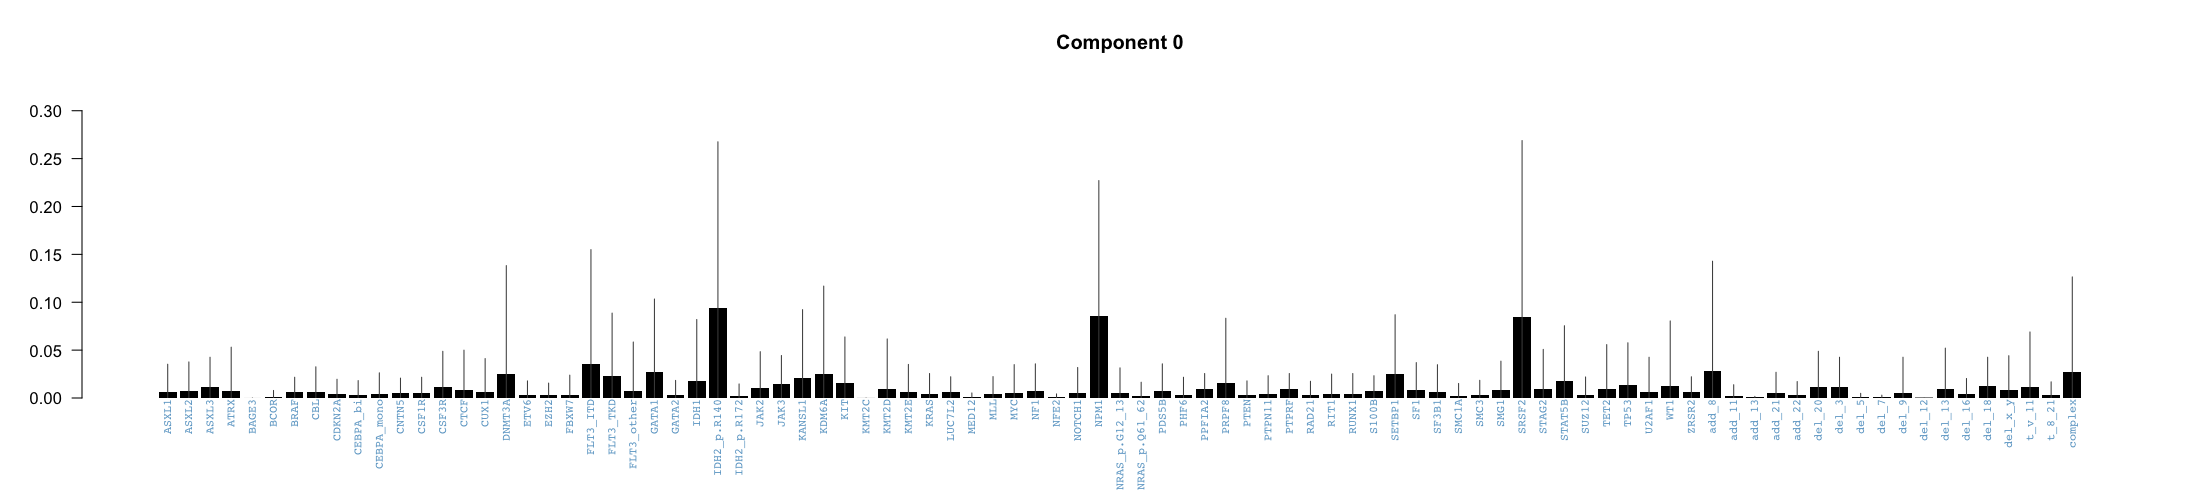

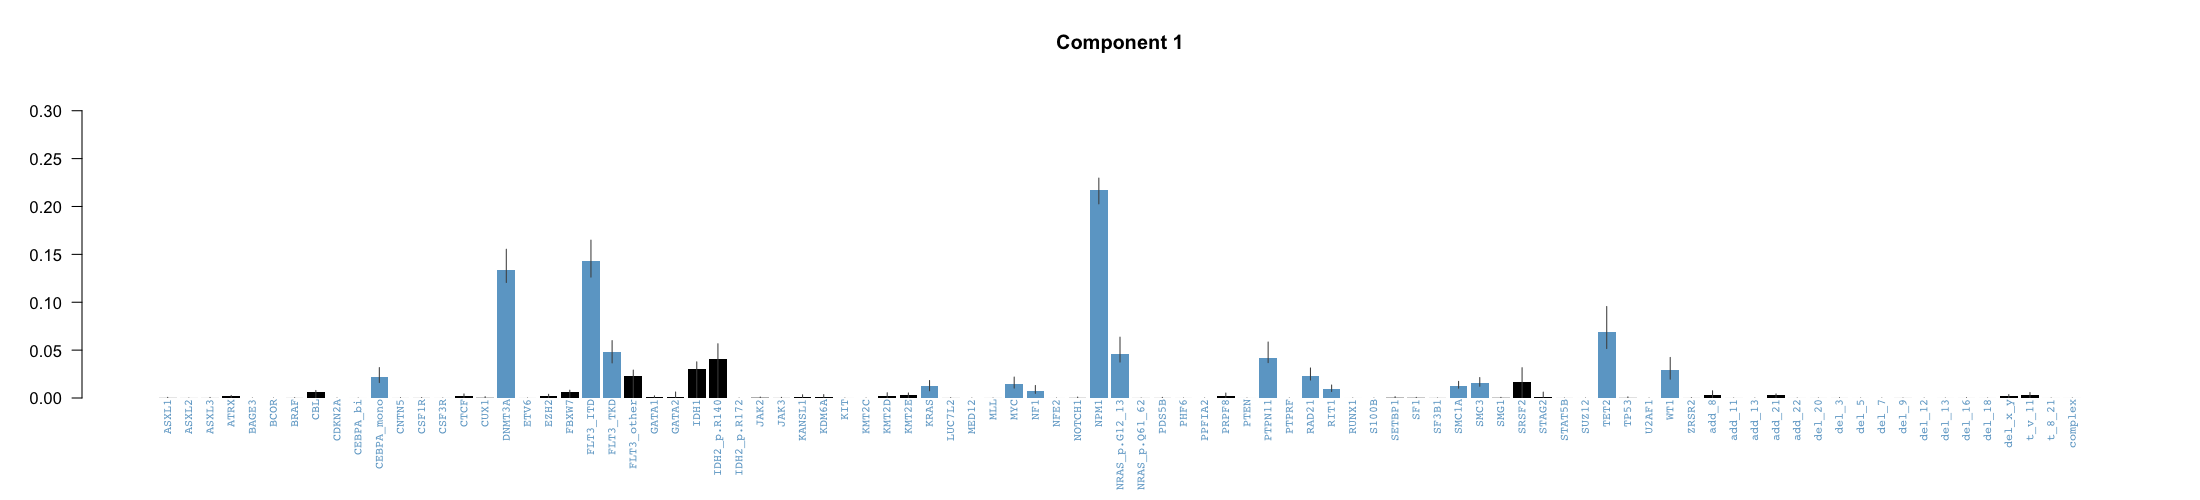

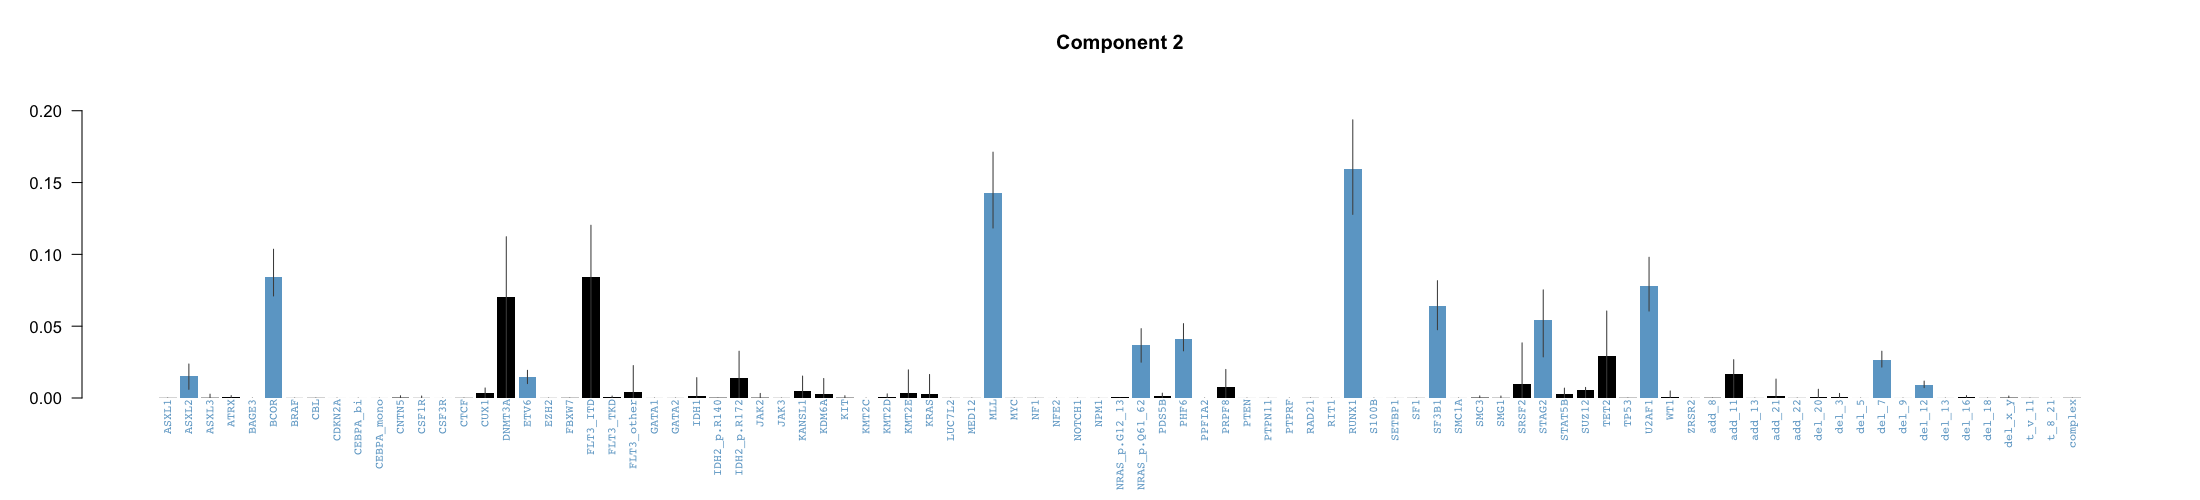

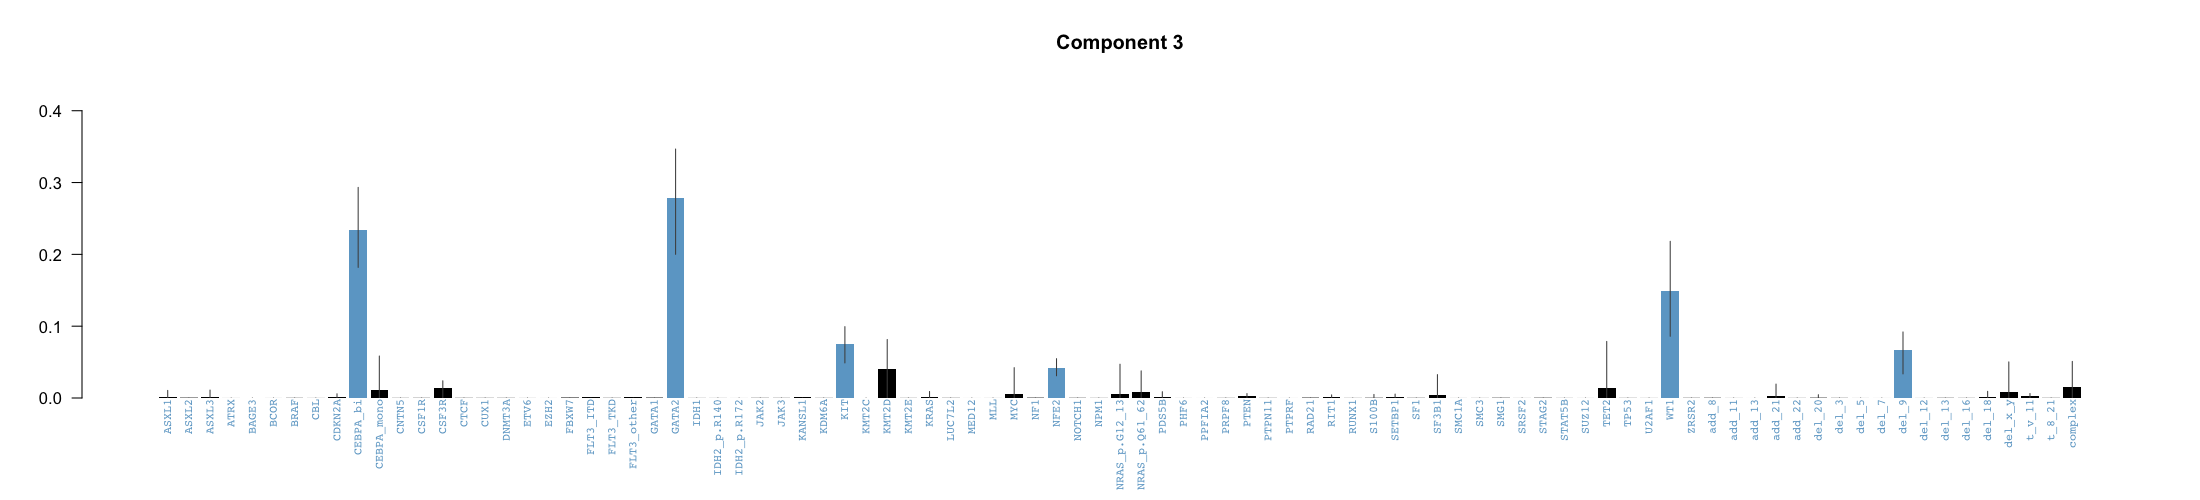

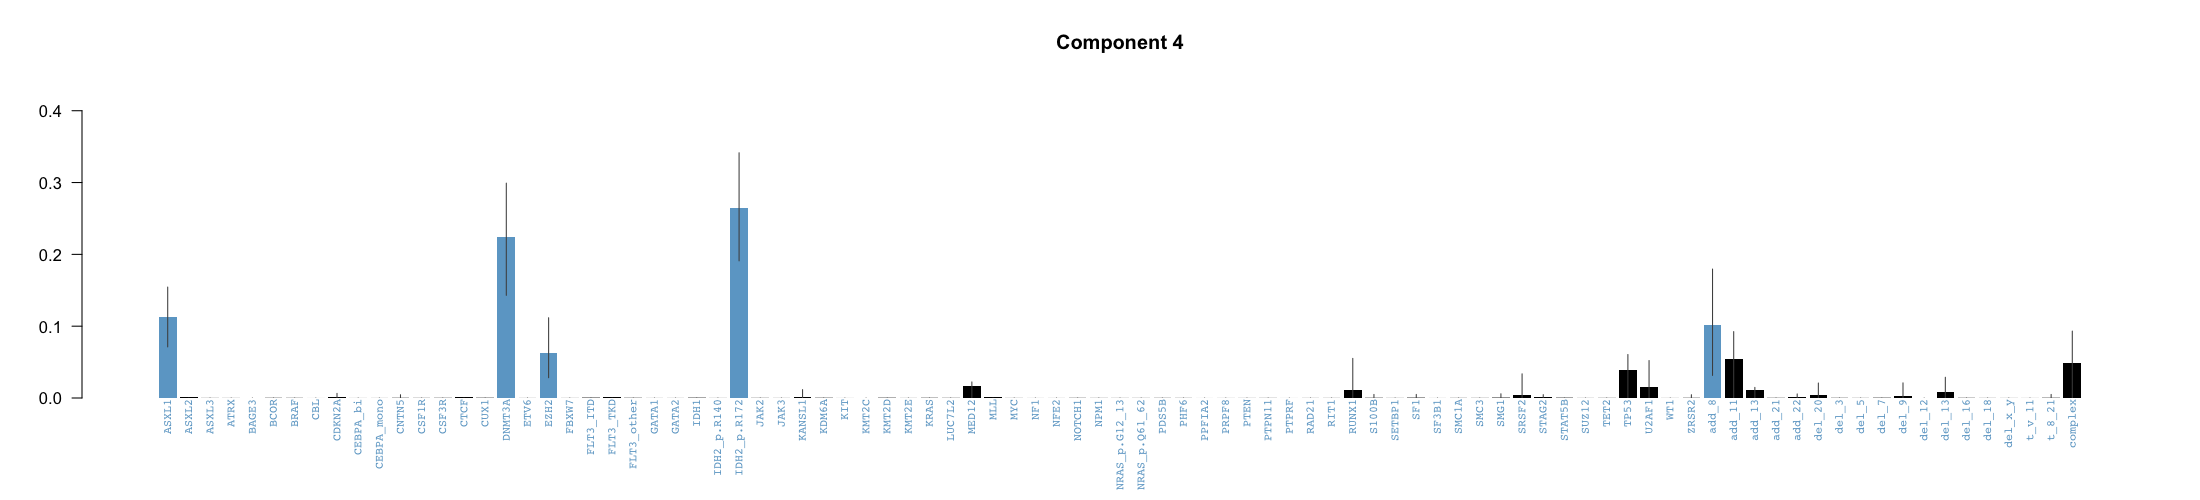

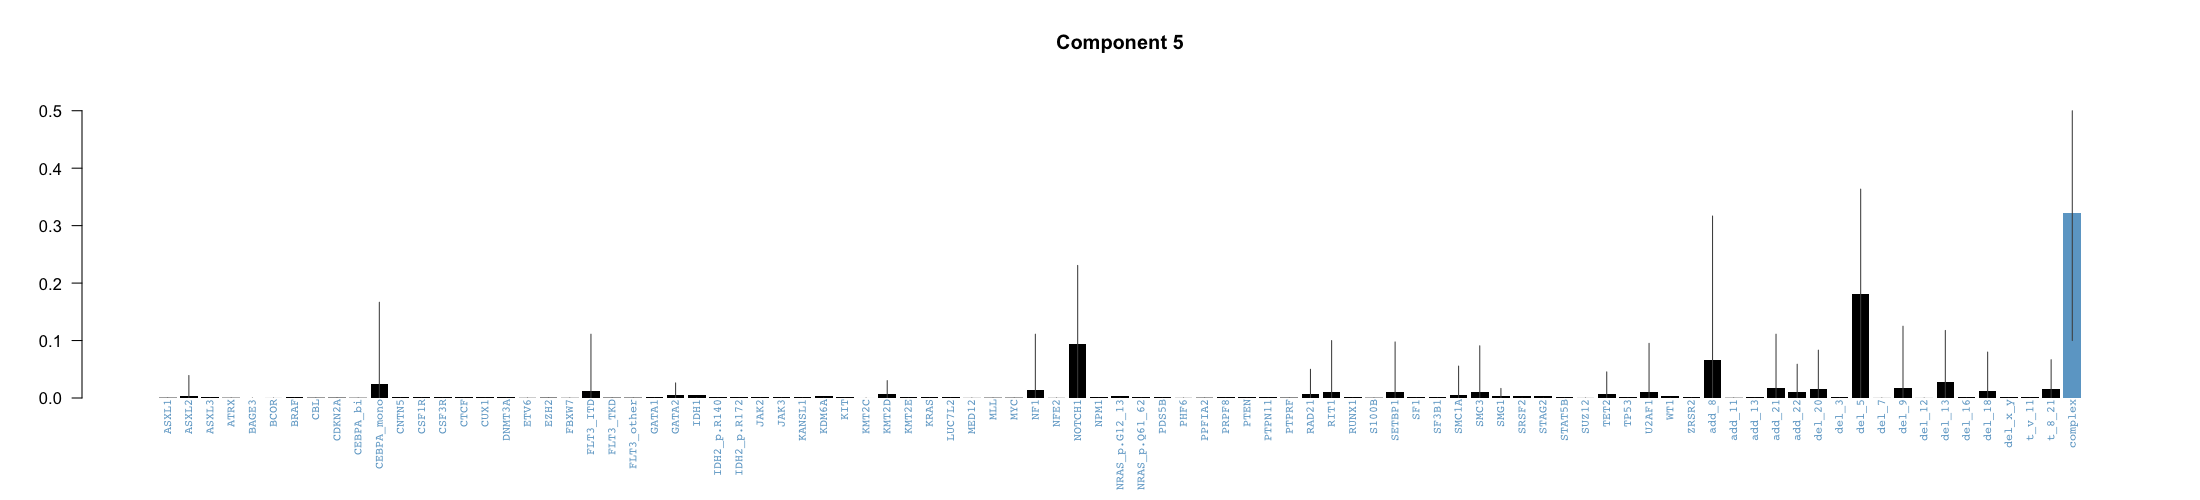

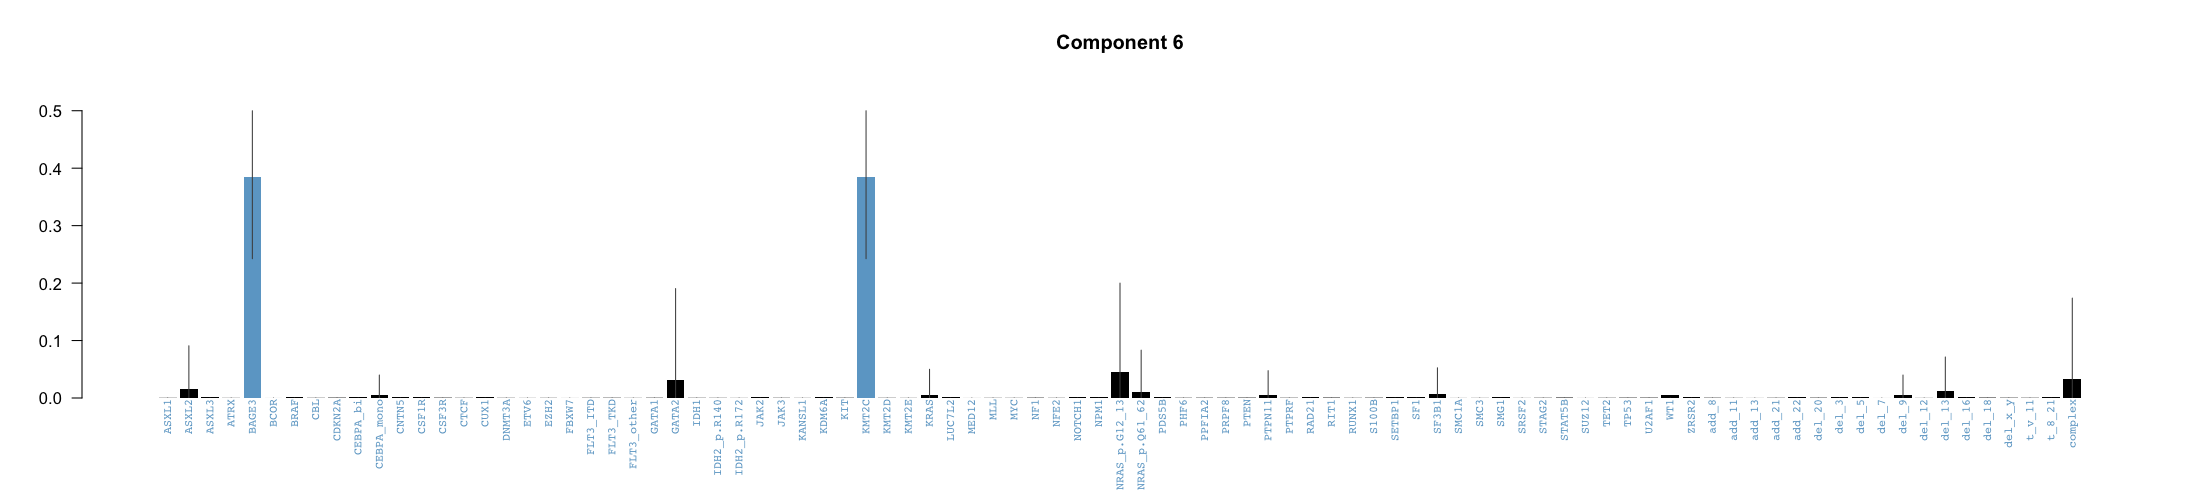

In [32]:
plot_category_distribution_by_component(multi_output_cluster_6, colnames(df_few_clustered))

In [33]:
dd_predicted_6_components <- get_prediction_result_dataframe(multi_output_cluster_6, df_few_clustered)
get_table(dd_predicted_6_components[,'predicted_component'])

Number of components: 6
Number of NA rows   : 0


values      count freq             
2  1            890  78.4140969162996 
3  2            155  13.6563876651982 
4  3             44  3.87665198237885 
5  4             38  3.34801762114537 
6  6              6  0.52863436123348 
1  0              2  0.176211453744493
11 -- total -- 1135  100%

In [34]:
write.table(dd_predicted_6_components,'dd_predicted_6_components.tsv',sep='\t',quote=F)

## Let's look at the results with 5 components

In [35]:
data <- df_few_clustered
posterior_samples <- 350
initial_clusters <- 17
burn <- 5000
chains <- 3
base_dist <- gaussian
aa <- 1
ab <-1

Initialise HDP on a 1135 x 91 dataframe
  → create HDP structure... done!
  → add DP node for each patient... done!
  → assign the data to the nodes... done!
### Experiment 1 (seed = 100) ###
Activate HDP nodes and run posterior sampling
  → activate HDP nodes... done!
  → run posterior sampling...
[1] "5000 burn-in iterations in 0.1 mins"

### Experiment 2 (seed = 200) ###
Activate HDP nodes and run posterior sampling
  → activate HDP nodes... done!
  → run posterior sampling...
[1] "5000 burn-in iterations in 0.1 mins"

### Experiment 3 (seed = 300) ###
Activate HDP nodes and run posterior sampling
  → activate HDP nodes... done!
  → run posterior sampling...
[1] "5000 burn-in iterations in 0.1 mins"

Object of class hdpSampleMulti 
 Number of chains: 3 
 Total posterior samples: 1050 
 Components: NO. Run hdp_extract_components 
 ----------
 Final hdpState from first chain: 
Object of class hdpState 
 Number of DP nodes: 1136 
 Index of parent DP: 0 1 1 1 1 1 1 1 1 1 ...
 Number of 

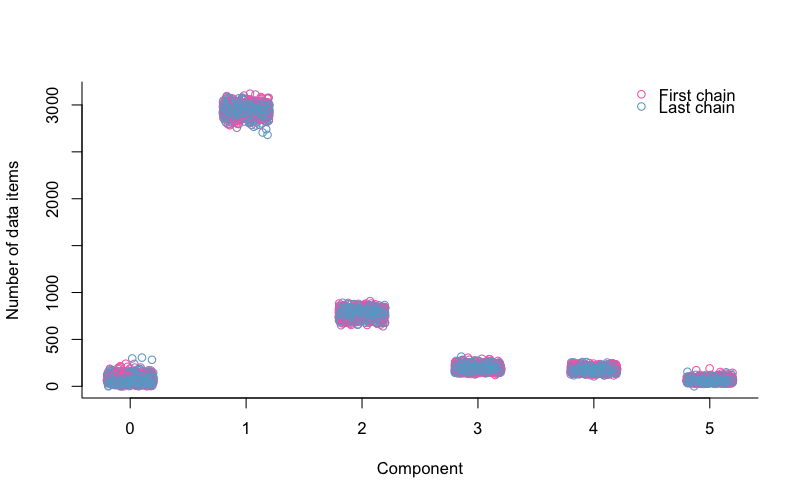

In [36]:
multi_output_5 <- launch(data,base_dist,initial_clusters,burn,posterior_samples,chains,aa,ab)
multi_output_cluster_5 <- extract_components(multi_output_5)
plot_components_size(multi_output_cluster_5)

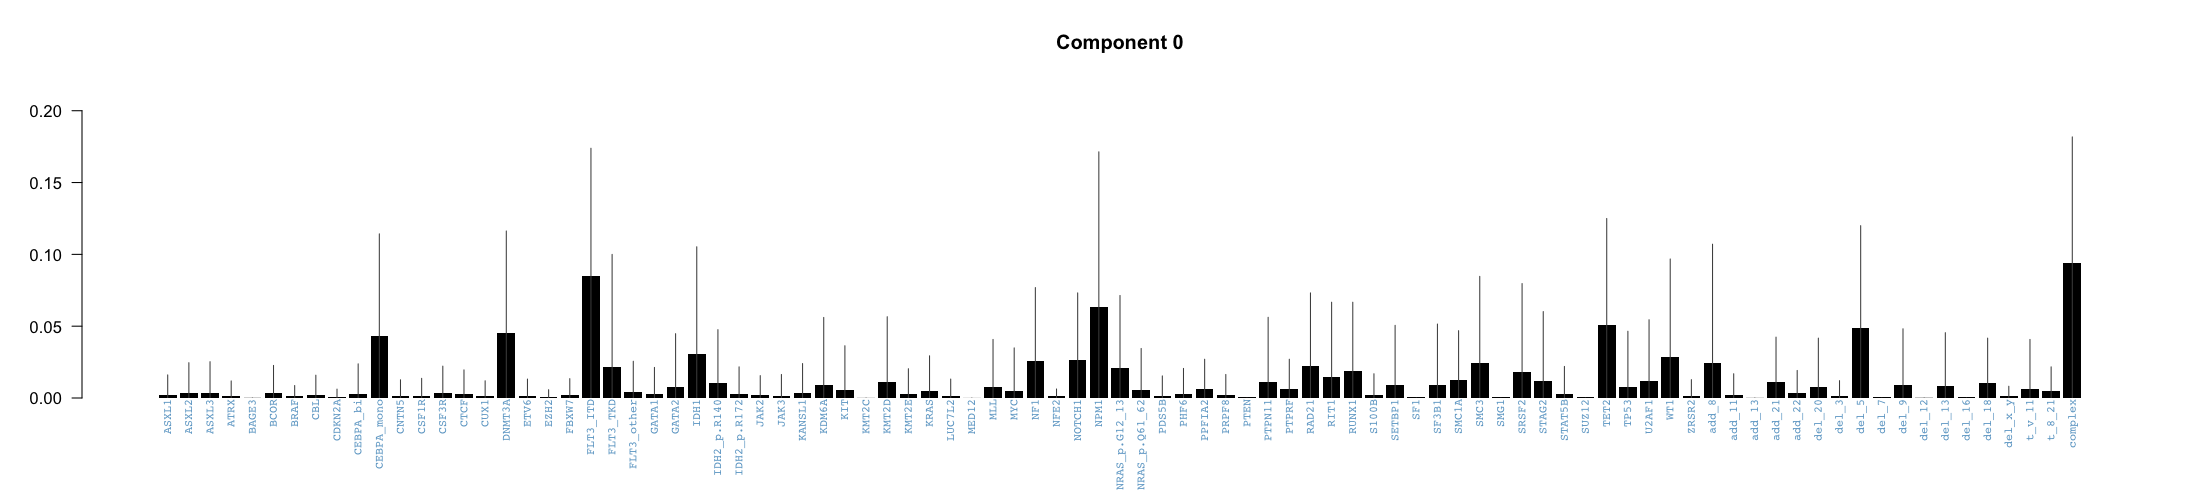

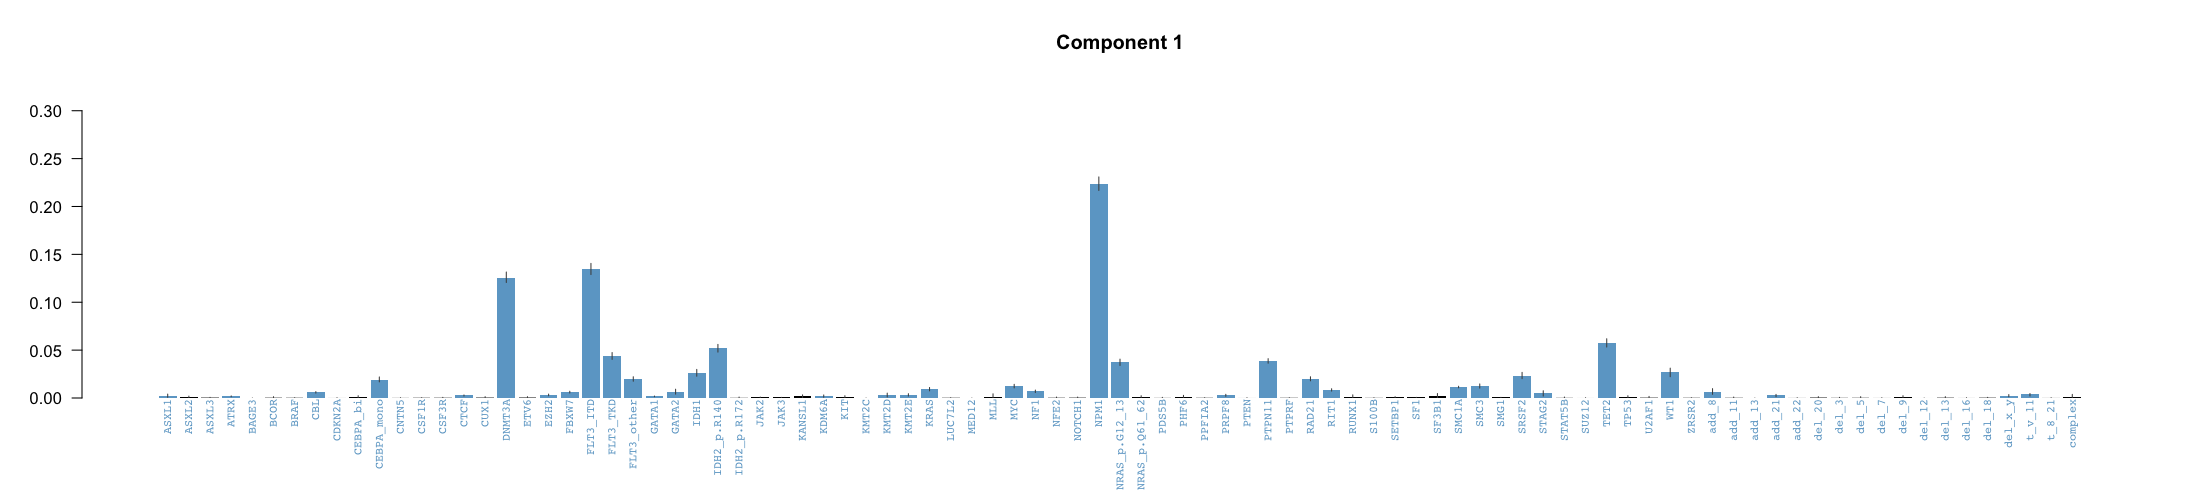

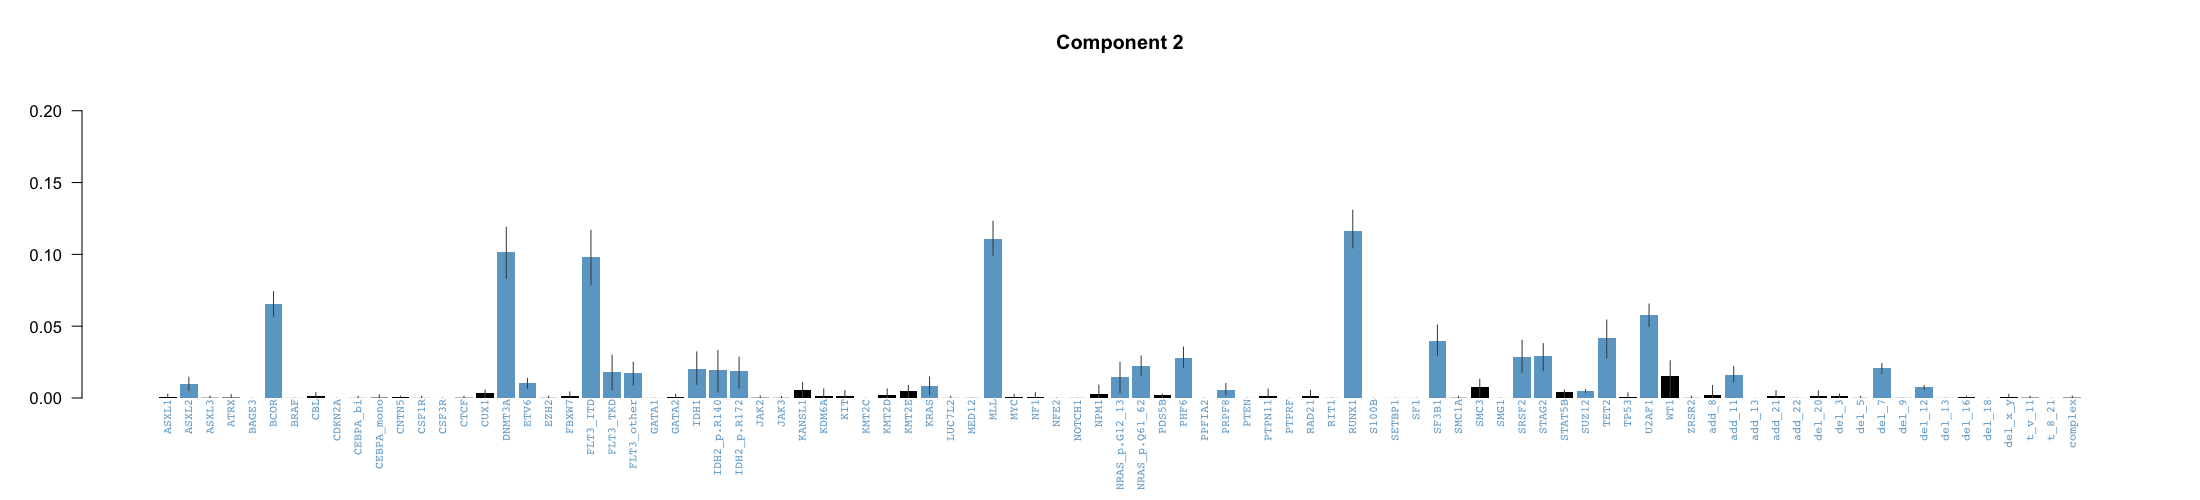

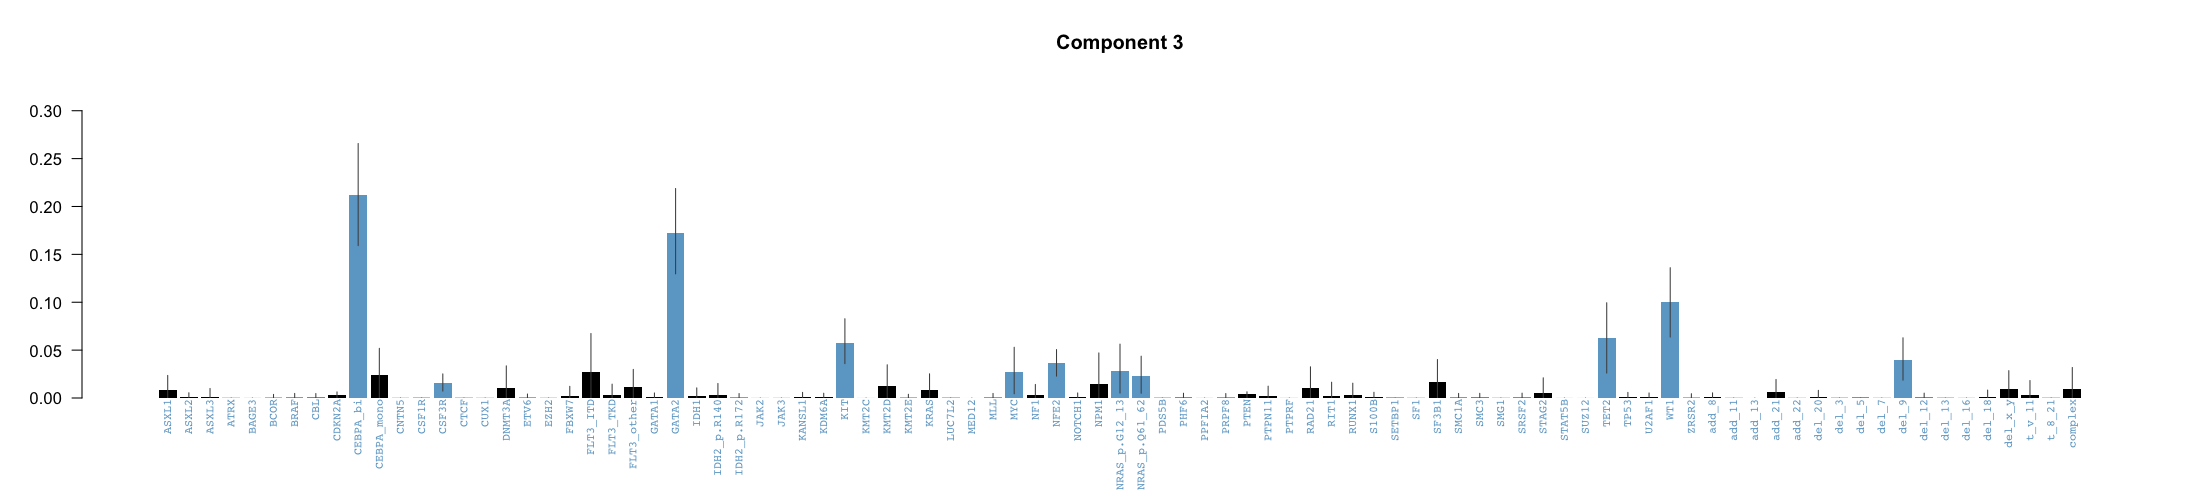

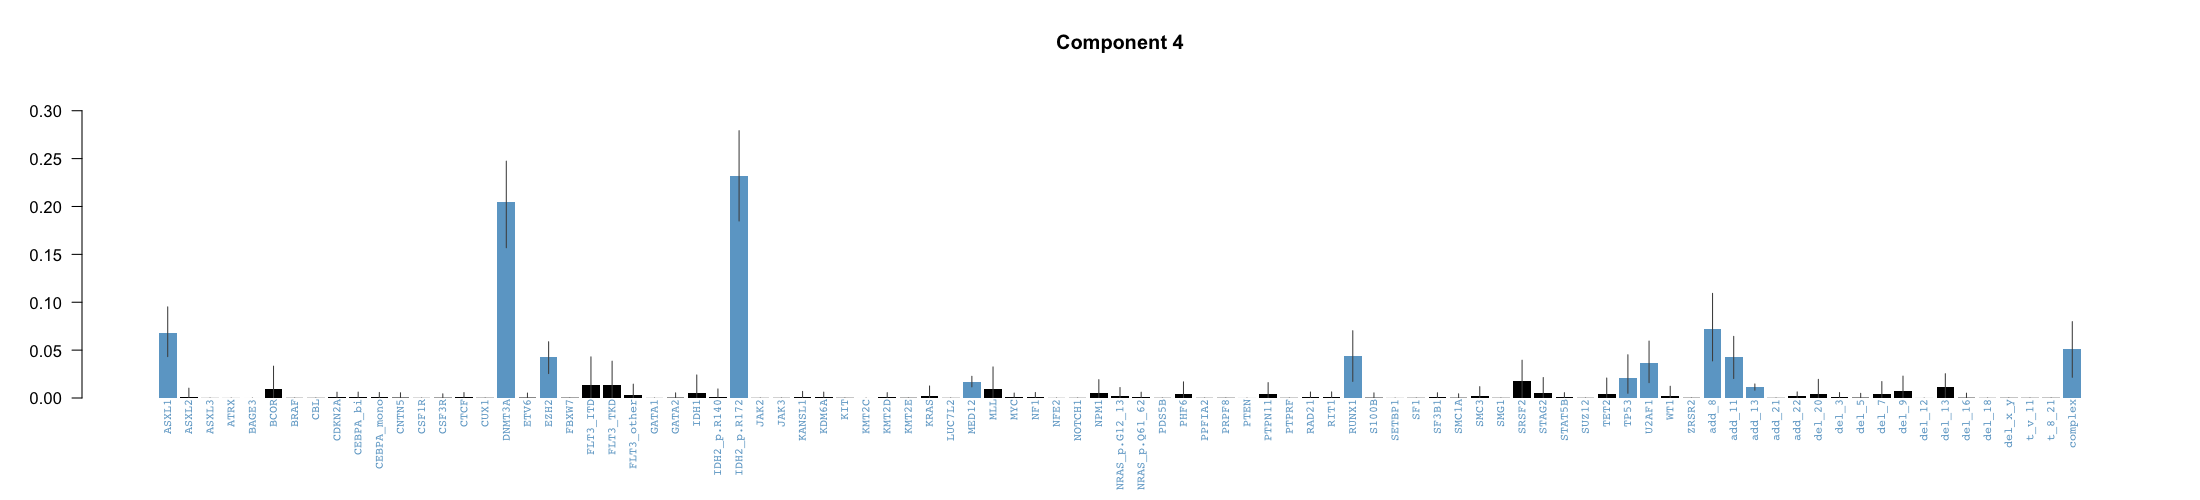

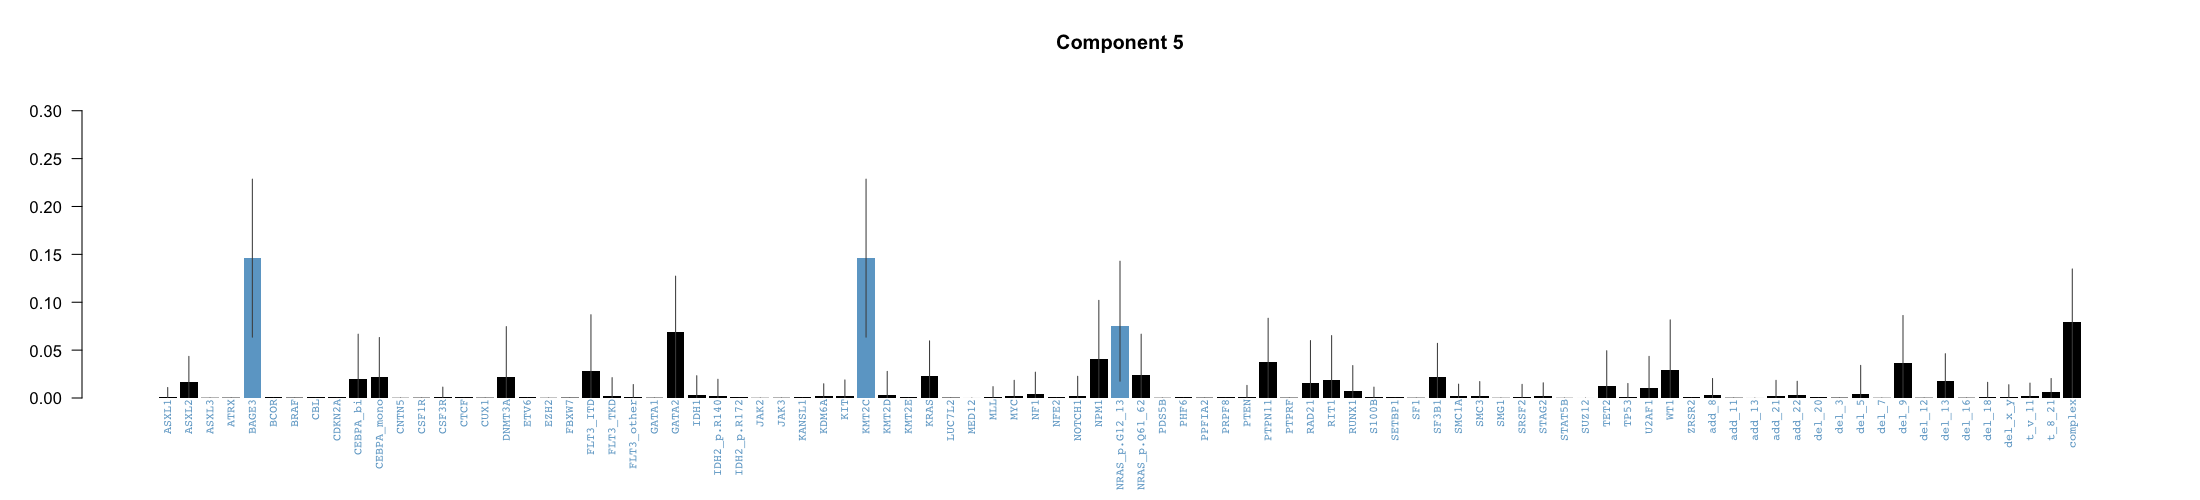

In [37]:
plot_category_distribution_by_component(multi_output_cluster_5, colnames(df_few_clustered))

In [38]:
dd_predicted_5_components <- get_prediction_result_dataframe(multi_output_cluster_5, df_few_clustered)
get_table(dd_predicted_5_components[,'predicted_component'])

Number of components: 5
Number of NA rows   : 0


values      count freq            
2  1            846  74.5374449339207
3  2            188  16.5638766519824
4  3             48  4.22907488986784
5  4             41  3.61233480176211
6  5              9  0.79295154185022
1  0              3  0.26431718061674
11 -- total -- 1135  100%

In [39]:
write.table(dd_predicted_5_components,'dd_predicted_5_components.tsv',sep='\t',quote=F)

# Elli's request stacked barplot to look at the ratio of components of initial clustering in the new clustering with 6 components.

## I) 10 components compared with 5 components

In [40]:
df_10_component <- cbind(df_final, dd_predicted_10_components)

##### Let's prepare the dataframes with 6,10 components that we will merge to look at the stacked barplot

In [41]:
df_5_component <- df_10_component[df_10_component$predicted_component == 1 | df_10_component$predicted_component == 4 | df_10_component$predicted_component == 7 | df_10_component$predicted_component == 8 | df_10_component$predicted_component == 10,]
dim(df_5_component)
df_5_component$predicted_old_component <- df_5_component$predicted_component
dim(df_5_component)
df_5_component <- df_5_component['predicted_old_component']
dim(df_5_component)

[1] 1135  116

[1] 1135  117

[1] 1135    1

In [42]:
tmp <- cbind(df_5_component, dd_predicted_5_components['predicted_component'])

In [3]:
ggplot(tmp, aes(factor(tmp$predicted_component),fill = tmp$predicted_old_component,order=predicted_old_component)) +
geom_bar(stat="count", position = "fill") + 
scale_fill_manual(values=c("firebrick1","dodgerblue","springgreen4","mediumpurple3","cornsilk"))+
labs(x = "Predicted component when we keep only part of the patients",title="Stacked by each patient grouped by previous components",fill="Predicted old component",y='count(%)')+
theme(plot.title = element_text(hjust = 0.5))

ERROR: Error in ggplot(tmp, aes(factor(predicted_component))): could not find function "ggplot"


#### This stacked bar plot shows that we have robust components because the IOU between the 5 components taken from the original dataset and the one with reduce dataset is very high . Therefore , the components formed in the initial clustering algorithm 

## II) Let's look at the count of features per component

In [129]:
df_10_component <- cbind(df_final, dd_predicted_10_components['predicted_component'])
tmp_cat <- as.data.frame(sapply(df_10_component, as.numeric))
categories_repartition <- data.frame(category = colnames(tmp_cat[1:(length(tmp_cat)-1)]))
for (i in 0:10)
    categories_repartition[sprintf('component_%d', i)] <- apply(categories_repartition, 1, function(s) sum(tmp_cat[tmp_cat$predicted_component == i, s['category']]))
categories_repartition['total_count'] <- rowSums(categories_repartition[,-1])
categories_repartition <- categories_repartition[order(categories_repartition$total_count, decreasing = TRUE),]
head(categories_repartition,50)                                                                

category      component_0 component_1 component_2 component_3 component_4
52  NPM1          0           0           668           7           1        
20  DNMT3A        0           0           373          69          22        
25  FLT3_ITD      0           1           409          25           6        
79  TET2          0           1           176         141          18        
103 complex       0           0            15          34         202        
66  RUNX1         0           1            10         194          13        
75  SRSF2         0           0            69         202           4        
54  NRAS_p.G12_13 0           0           111          75           5        
33  IDH2_p.R140   0           0           149          62           7        
84  add_8         0           1            24          85          58        
26  FLT3_TKD      0           0           130          16           2        
92  del_7         0           0             1          55          89        
80  TP53          0           0             6           8         155        
1   ASXL1         0           0             9         133           4        
61  PTPN11        0           0           113          28           7        
91  del_5         0           0             3           3         137        
32  IDH1          0           0            81          39           6        
82  WT1           0           0            86           8           1        
76  STAG2         0           0            20          89           1        
46  MLL           0           0             4          25           4        
43  KRAS          0           0            29          45           6        
12  CEBPA_mono    0           0            59          36           1        
81  U2AF1         0           0             2          47           5        
99  del_x_y       0           0             8           7          32        
102 t_8_21        0           0             1           1           1        
6   BCOR          0           0             5          40           3        
27  FLT3_other    0           1            60           8           0        
101 inv_16        0           0             0           0           1        
23  EZH2          0           0            10          54           4        
39  KIT           0           0             7           7           2        
29  GATA2         0           0            26          20           1        
55  NRAS_p.Q61_62 0           0             6          12           7        
64  RAD21         0           1            62           4           3        
85  add_11        0           0             2           5          53        
87  add_21        0           0             8          29          28        
49  NF1           0           0            21          26          12        
97  del_17        0           0             0           0          74        
57  PHF6          0           1             7          30           5        
70  SF3B1         0           0            12           3           4        
93  del_9         0           0             6           3          24        
100 t_v_11        0           0            12           4          17        
34  IDH2_p.R172   0           0             1           3           1        
89  del_20        0           0             2          16          39        
88  add_22        0           0             1           2          31        
94  del_12        0           0             1           2          48        
98  del_18        0           0             2           1          52        
71  SMC1A         0           0            34          12           1        
11  CEBPA_bi      0           1             8           8           0        
72  SMC3          0           0            35           1           0        
96  del_16        0           0             0           1          45        
    component_5 component_

In [171]:
transp_df_10 <-(as.data.frame(t(df_10_component)))
colnames(transp_df_10) = gsub("V", "Patient ", colnames(transp_df_10))
transp_df_10$features <- rownames(transp_df_10)
transp_df_10 <- transp_df_10[-nrow(transp_df_10),]
#tail(transp_df_10)

In [ ]:
melt.data<-melt(transp_df_10, variable_name="Patients")
head(melt.data)

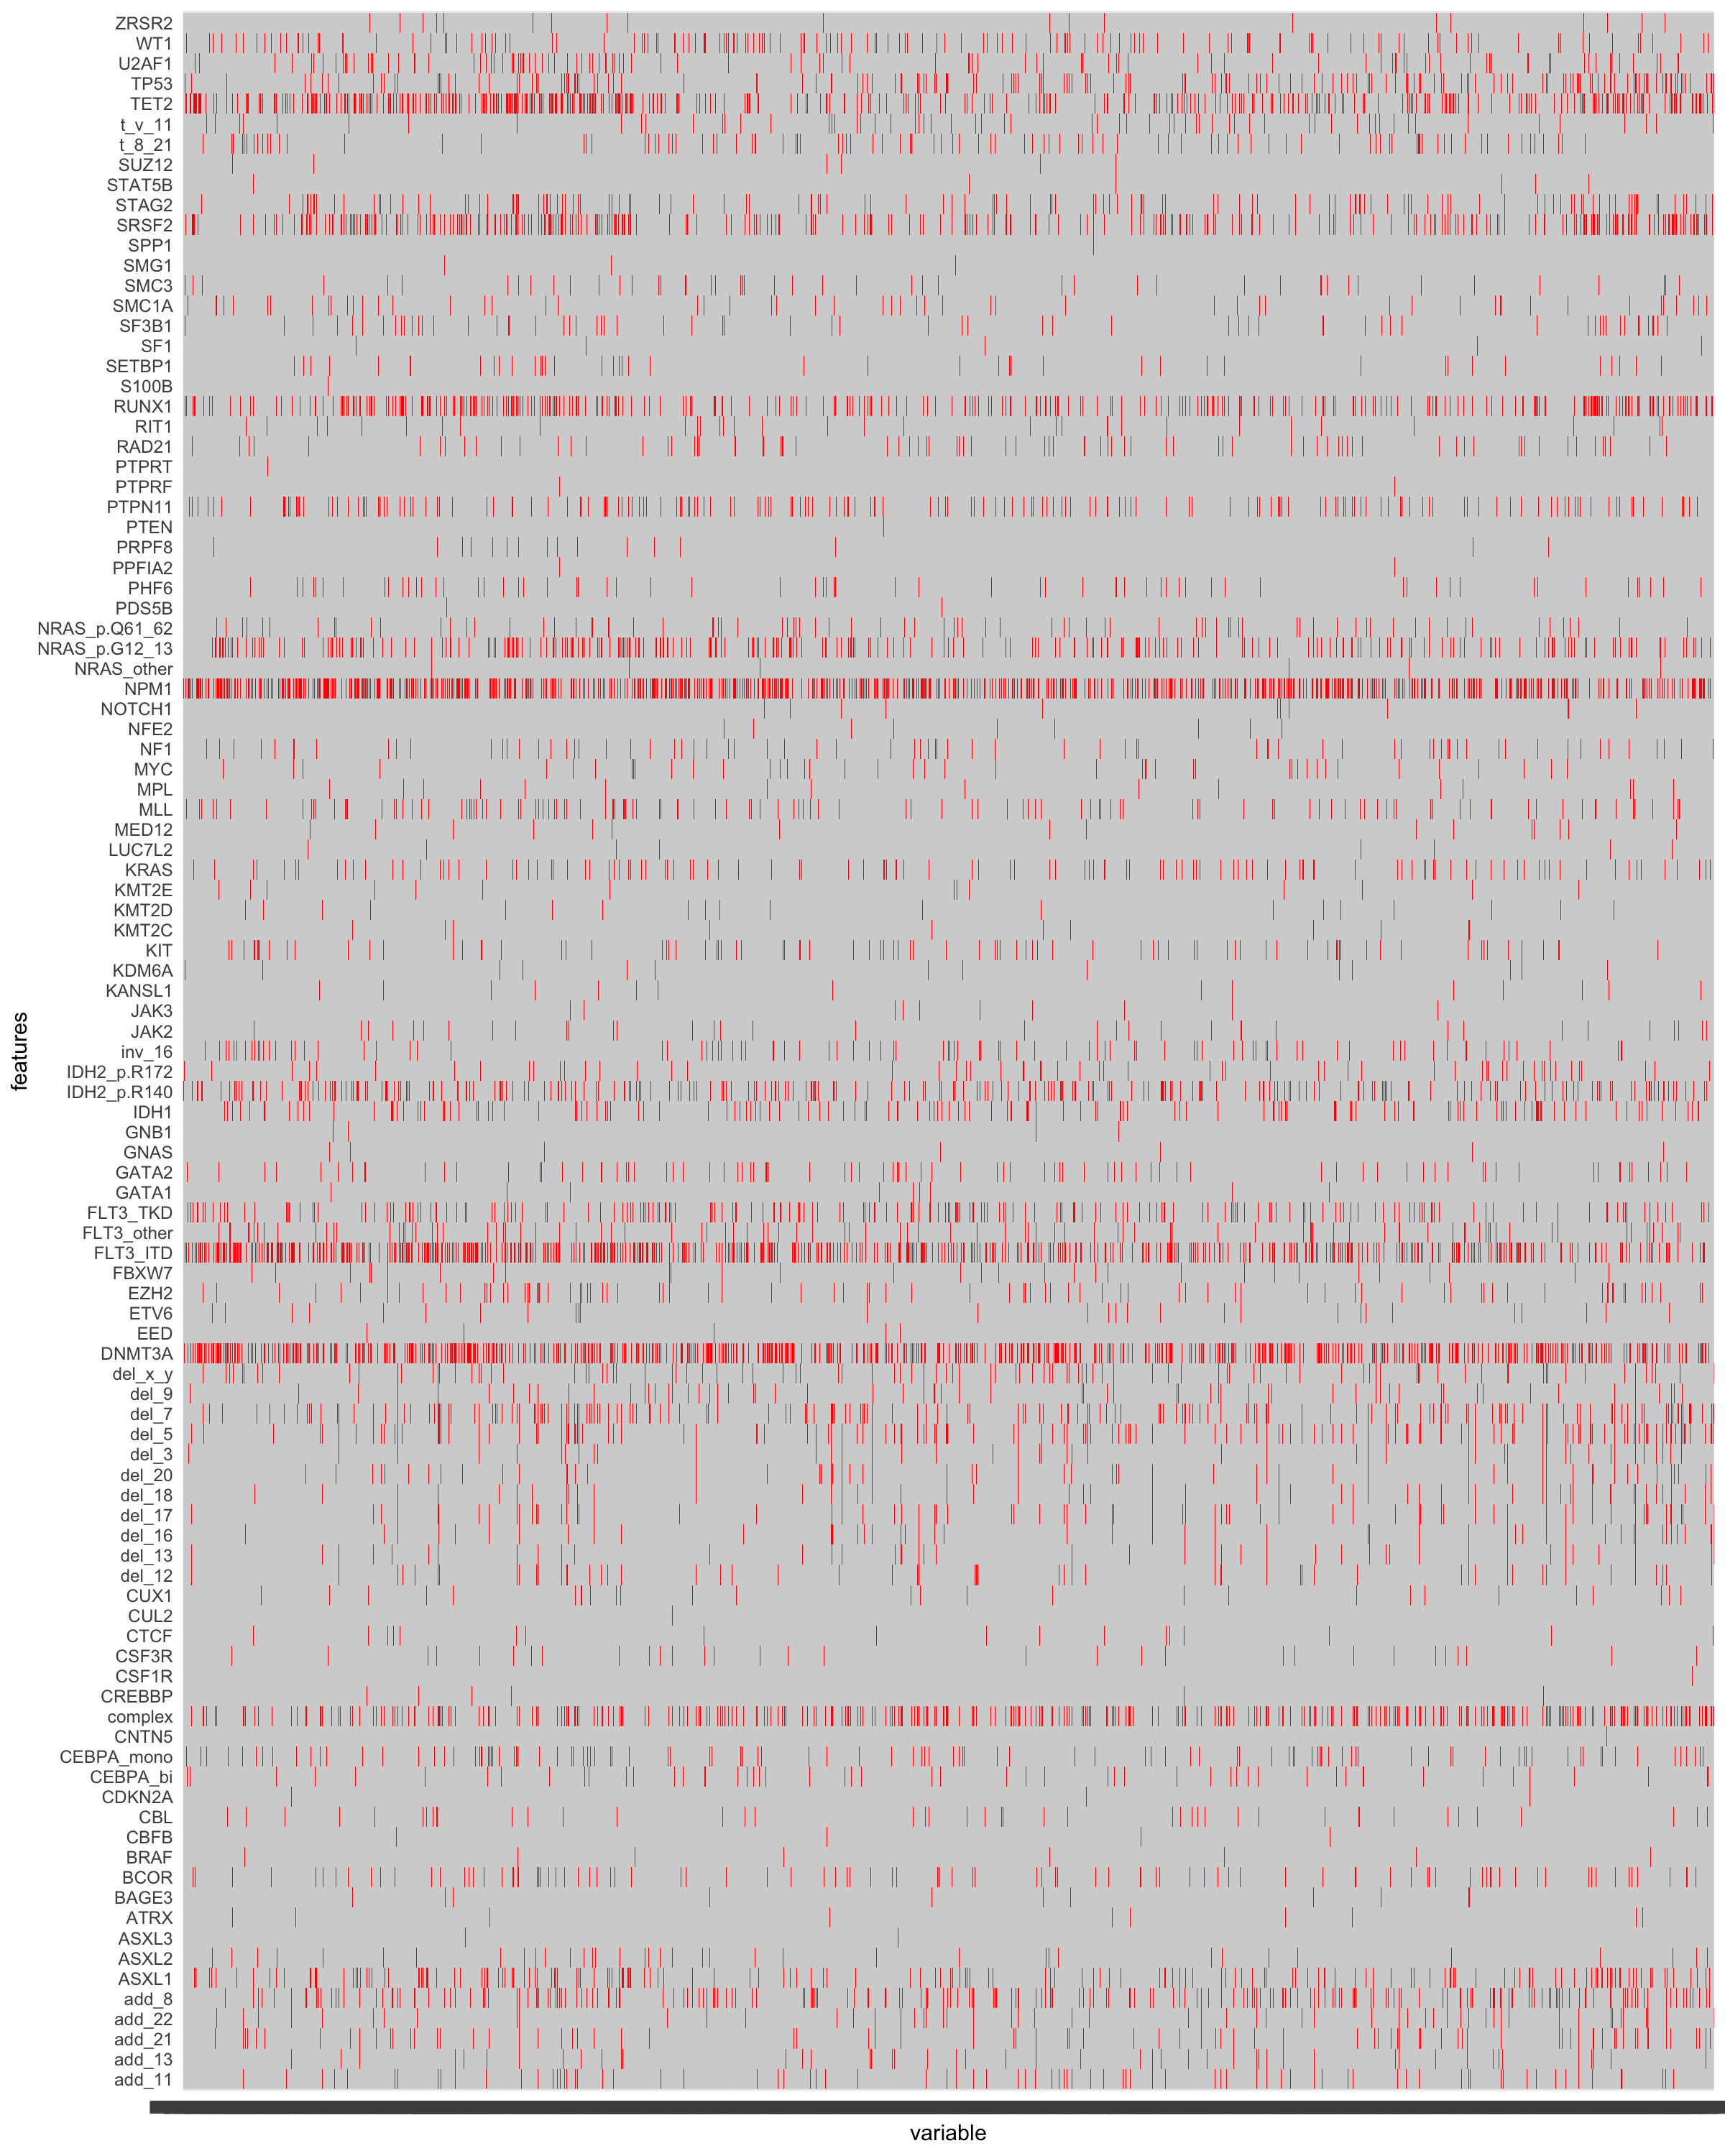

In [117]:
options(repr.plot.res = 200)
set_notebook_plot_size(12, 15)

# plot the heatmap
ggplot(melt.data, aes(variable,features)) +
geom_raster(aes(fill = factor(value)), show.legend = FALSE) +
scale_fill_manual(values = c('0' = 'lightgrey', '1' = 'red')) 

In [199]:
df_10_component <- cbind(df_final, dd_predicted_10_components['predicted_component'])
head(df_10_component)
tmp_10 <- df_10_component[order(df_10_component$predicted_component),]
tmp_10 <- tmp_10[tmp_10$predicted_component==1 | tmp_10$predicted_component==2 | tmp_10$predicted_component==3 | tmp_10$predicted_component==4 | tmp_10$predicted_component==5 | tmp_10$predicted_component==6 | tmp_10$predicted_component==7 | tmp_10$predicted_component==8 | tmp_10$predicted_component==9 | tmp_10$predicted_component==10 ,]

ASXL1 ASXL2 ASXL3 ATRX BAGE3 BCOR BRAF CBFB CBL CDKN2A CEBPA_bi CEBPA_mono
0 0     0     0     0    0     0    0    0    0   0      0        0         
1 0     0     0     0    0     0    0    0    0   0      0        0         
2 0     0     0     0    0     0    0    0    0   0      0        0         
3 0     0     0     0    0     0    0    0    0   0      0        0         
4 0     0     0     0    0     0    0    0    0   0      0        1         
5 0     0     0     0    0     0    0    0    0   0      1        0         
  CNTN5 CREBBP CSF1R CSF3R CTCF CUL2 CUX1 DNMT3A EED ETV6 EZH2 FBXW7 FLT3_ITD
0 0     0      0     0     0    0    0    0      0   0    0    0     0       
1 0     0      0     0     0    0    0    1      0   0    0    0     0       
2 0     0      0     0     0    0    0    0      0   0    0    0     1       
3 0     0      0     0     0    0    0    0      0   0    0    0     0       
4 0     0      0     0     0    0    0    0      0   0    0    0     1       
5 0     0      0     0     0    0    0    0      0   0    0    0     0       
  FLT3_TKD FLT3_other GATA1 GATA2 GNAS GNB1 IDH1 IDH2_p.R140 IDH2_p.R172 JAK2
0 0        0          0     0     0    0    0    1           0           0   
1 0        0          0     0     0    0    0    0           1           0   
2 0        0          0     0     0    0    0    0           0           0   
3 0        0          0     0     0    0    0    0           0           0   
4 0        0          0     0     0    0    0    0           0           0   
5 0        0          0     1     0    0    0    0           0           0   
  JAK3 KANSL1 KDM6A KIT KMT2C KMT2D KMT2E KRAS LUC7L2 MED12 MLL MPL MYC NF1
0 0    0      0     0   0     0     0     0    0      0     0   0   0   0  
1 0    0      0     0   0     0     0     0    0      0     0   0   0   0  
2 0    0      1     0   0     0     0     0    0      0     0   0   0   0  
3 0    0      0     0   0     0     0     0    0      0     0   0   0   0  
4 0    0      0     0   0     0     0     0    0      0     1   0   0   0  
5 0    0      0     0   0     0     0     0    0      0     0   0   0   0  
  NFE2 NOTCH1 NPM1 NRAS_other NRAS_p.G12_13 NRAS_p.Q61_62 PDS5B PHF6 PPFIA2
0 0    0      1    0          0             0             0     0    0     
1 0    0      0    0          0             0             0     0    0     
2 0    0      0    0          0             0             0     0    0     
3 0    0      1    0          0             0             0     0    0     
4 0    0      0    0          0             0             0     0    0     
5 0    0      0    0          0             0             0     0    0     
  PRPF8 PTEN PTPN11 PTPRF PTPRT RAD21 RIT1 RUNX1 S100B SETBP1 SF1 SF3B1 SMC1A
0 0     0    0      0     0     0     0    0     0     0      0   0     0    
1 0     0    0      0     0     0     0    0     0     0      0   0     0    
2 0     0    0      0     0     0     0    1     0     0      0   1     0    
3 0     0    0      0     0     0     0    0     0     0      0   0     0    
4 0     0    0      0     0     0     0    1     0     0      0   0     0    
5 0     0    0      0     0     0     0    0     0     0      0   0     0    
  SMC3 SMG1 SPP1 SRSF2 STAG2 STAT5B SUZ12 TET2 TP53 U2AF1 WT1 ZRSR2 add_8
0 0    0    0    0     0     0      0     0    0    0     0   0     0    
1 0    0    0    0     0     0      0     0    0    0     0   0     0    
2 1    0    0    0     0     0      0     0    1    0     0   0     0    
3 0    0    0    1     0     0      0     1    0    0     0   0     0    
4 0    0    0    0     0     0      0     1    0    0     1   0     0    
5 0    0    0    0     0     0      0     0    0    0     0   0     0    
  add_11 add_13 add_21 add_22 del_20 del_3 del_5 del_7 del_9 del_12 del_13
0 0      0      0      0      0      0     0     0     0     0      0     
1 0      0      0      0      0      0     0     0     0     0      0     
2 0      0      0 

In [200]:
transp_df_10 <-(as.data.frame(t(tmp_10)))
#colnames(transp_df_10) = gsub("V", "Patient ", colnames(transp_df_10))
transp_df_10$features <- rownames(transp_df_10)
transp_df_10 <- transp_df_10[-nrow(transp_df_10),]


In [201]:
melt.data<-melt(transp_df_10,id.vars ="features", variable_name=colnames(transp_df_10))
head(melt.data)

Warning message:
“attributes are not identical across measure variables; they will be dropped”

features variable value
1 ASXL1    0        0    
2 ASXL2    0        0    
3 ASXL3    0        0    
4 ATRX     0        0    
5 BAGE3    0        0    
6 BCOR     0        0

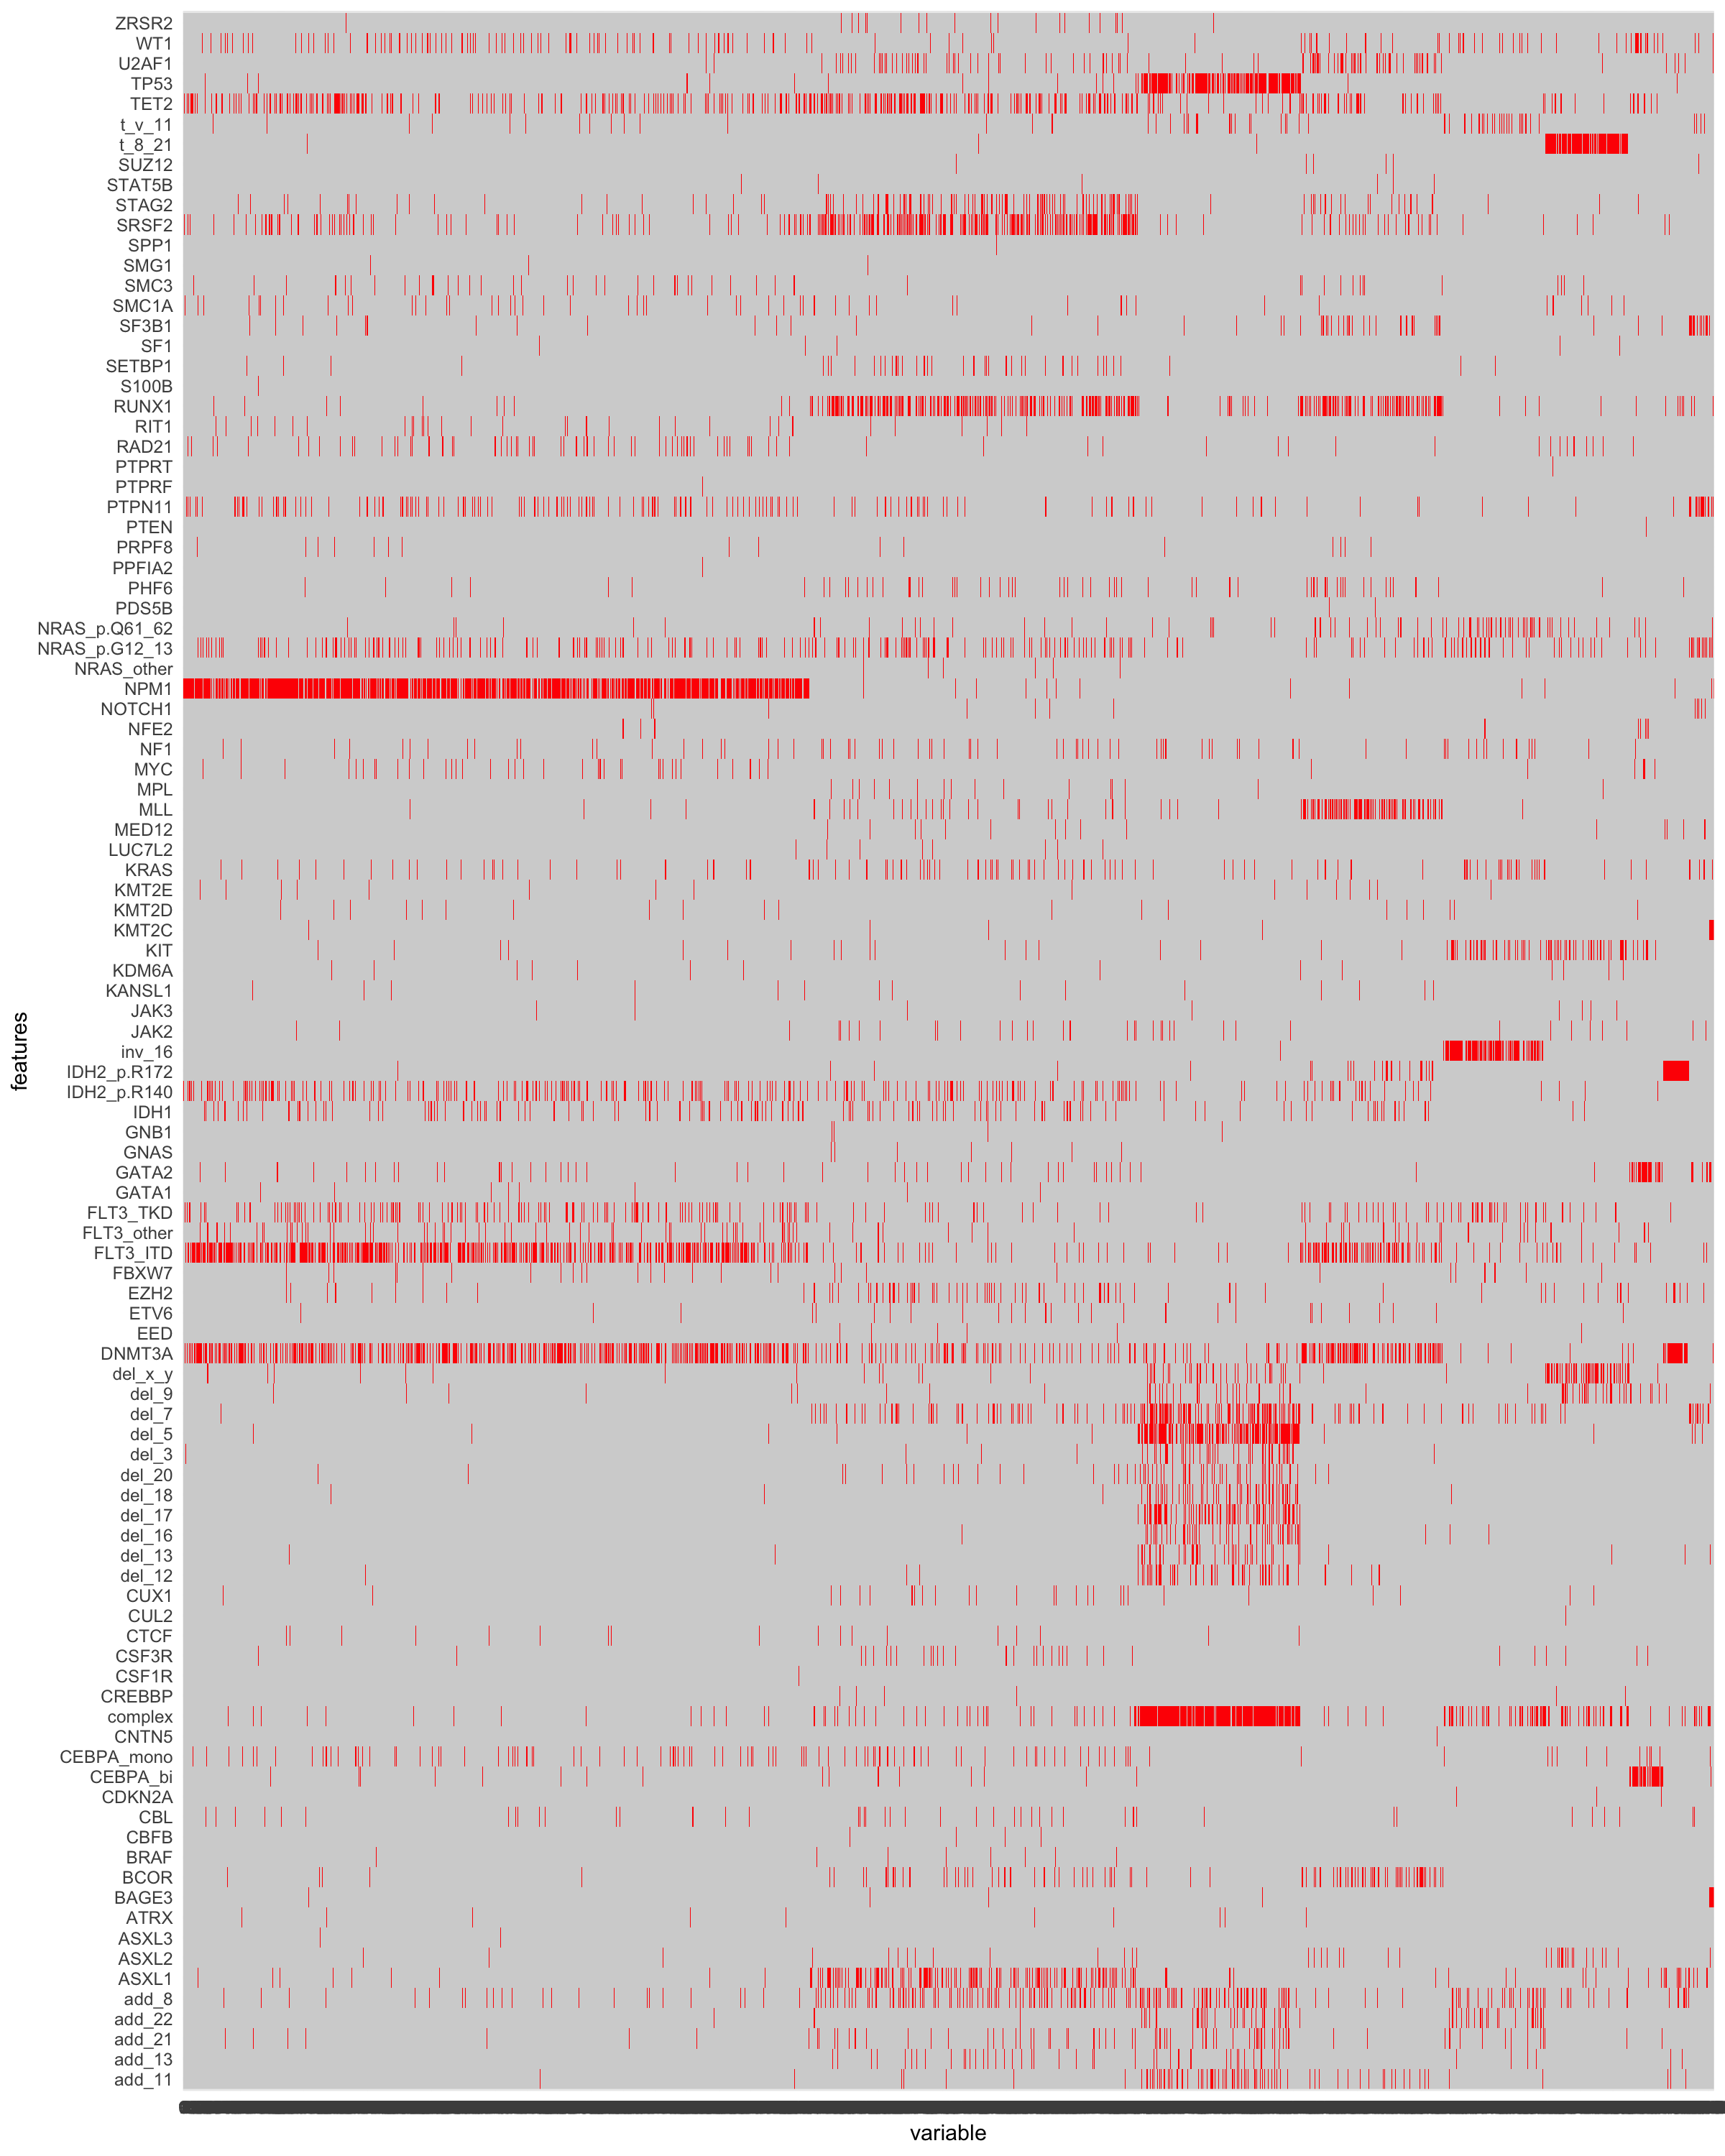

In [202]:
options(repr.plot.res = 200)
set_notebook_plot_size(12, 15)

# plot the heatmap
ggplot(melt.data, aes(variable,features)) +
geom_raster(aes(fill = factor(value)), show.legend = FALSE) +
scale_fill_manual(values = c('0' = 'lightgrey', '1' = 'red')) 

In [206]:
dd_predicted_10_components$predited_component

NULL